<img src="./src/img/3.png" style="width: 100%; display: block; margin: 0; padding: 0;">

![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Seaborn](https://img.shields.io/badge/Seaborn-blue?style=for-the-badge)

In [2]:

# Importación de Librerías y Configuración

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
from scipy import stats

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('viridis')

# Configuración estética de gráficas
sns.set_theme(style="whitegrid")
%matplotlib inline

In [3]:
# Carga y Consolidación de Datos

ruta= "./src/data/alquiler/"

archivos_alquiler= list(os.listdir(ruta))
print(archivos_alquiler)
dfs={}

for fichero in archivos_alquiler:
    nombre_df= fichero
    ruta_fichero= ruta+fichero
    df= pd.read_csv(ruta_fichero)
    dfs[fichero]= df
df_total_alquiler= pd.concat(dfs.values(), ignore_index=True)

df_total_alquiler

ruta= "./src/data/ventas/"

archivos_alquiler= list(os.listdir(ruta))
print(archivos_alquiler)
dfs={}

for fichero in archivos_alquiler:
    nombre_df= fichero
    ruta_fichero= ruta+fichero
    df= pd.read_csv(ruta_fichero)
    dfs[fichero]= df
df_total_ventas= pd.concat(dfs.values(), ignore_index=True)

print(len(df_total_ventas))

df= pd.concat([df_total_ventas,df_total_alquiler])
df.to_excel("Dataframe.xlsx", index=False)

['a_abril_2025.csv', 'a_agosto_2025.csv', 'a_diciembre_2025.csv', 'a_enero_2025.csv', 'a_febrero_2025.csv', 'a_julio_2025.csv', 'a_junio_2025.csv', 'a_marzo_2025.csv', 'a_mayo_2025.csv', 'a_noviembre_2025.csv', 'a_octubre_2025.csv', 'a_septiembre_2025.csv']
['v_abril_2025.csv', 'v_agosto_2025.csv', 'v_diciembre_2025.csv', 'v_enero_2025.csv', 'v_febrero_2025.csv', 'v_julio_2025.csv', 'v_junio_2025.csv', 'v_marzo_2025.csv', 'v_mayo_2025.csv', 'v_noviembre_2025.csv', 'v_octubre_2025.csv', 'v_septiembre_2025.csv']
24000


In [4]:
# creando el indice de referencia
df["Referencia_interna"]= df["Latitud"].astype(str).replace(".","")+ df["Longitud"].astype(str).replace(".","")
df["Referencia_interna"]

0        39.4664874858-0.3811585142
1        39.4883637946-0.3721260874
2        39.4879188989-0.3725709831
3                39.4781988-0.32921
4                39.4781988-0.32921
                    ...            
23995          39.4461182-0.3654679
23996    39.4940344899-0.3935838101
23997    39.4847111258-0.3565108742
23998    39.4550180899-0.3420149101
23999    39.4464774009-0.3811166681
Name: Referencia_interna, Length: 48000, dtype: object

In [5]:
# Eliminar duplicados
df = df.sort_values(by='Precio')
df_limpio = df.drop_duplicates(subset=['Referencia_interna', 'Operación'])

df["Referencia_interna"].nunique()
df.nunique()
len(df)

df

,Fuente,Referencia,Operación,Tipología,Título,C.P.,Municipio,Provincia,Distrito,Barrio,...,Estado,Ranking,Dormitorios,Baños,Superficie,Precio,Precio unitario,Días,Demanda,Referencia_interna
22996,milanuncios,558512280,Alquiler,Unifamiliar,El Saler - Av. de la Gola del Puchol,46012.0,Valencia,Valencia,El Saler,NaN,...,No contactado,432,4.0,2.0,145,1,NaN,11.0,Muy alta,39.3575325012-0.320132792
15462,habitaclia,BART-200,Alquiler,Unifamiliar,UNA ALQUERÍA CON INFINITAS POSIBILIDADES,NaN,Valencia,Valencia,El Castellar i l'Oliverar,NaN,...,No contactado,1110,7.0,1.0,413,1,NaN,1.0,Moderada,39.4318305052-0.3647036748
15381,Fotocasa,BART-200,Alquiler,Finca rústica,Finca rústica en Alquiler en El Castellar i l'...,46026.0,Valencia,Valencia,El Castellar i l'Oliverar,NaN,...,No contactado,2738,7.0,1.0,413,1,NaN,1.0,Moderada,39.4290398992-0.3674942808
10129,milanuncios,551294295,Alquiler,Unifamiliar,Benicalap - C/ del Mondúver,46025.0,Valencia,Valencia,Benicalap,Barrio de Benicalap,...,No contactado,210,3.0,1.0,80,1,NaN,3.0,Muy alta,39.4896816-0.3877703
275,milanuncios,541941577,Alquiler,Plurifamiliar,Barrio Patraix - Carrer de l''Humanista,46014.0,Valencia,Valencia,Patraix,Safranar,...,No contactado,251,2.0,1.0,89,1,NaN,6.0,Muy alta,39.4597868-0.3945716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10710,habitaclia,CV-1425,Venta,Plurifamiliar,VIVIENDA CON REFORMA DE LUJO EN VENTA,NaN,Valencia,Valencia,L'Eixample,El Pla del Remei,...,No contactado,9319,4.0,5.0,342,3500000,10233.0,5.0,Muy baja,39.4698835659-0.3681607341
15523,Fotocasa,18025,Venta,Finca rústica,Finca rústica en Venta en Barrio de Campanar,46015.0,Valencia,Valencia,Campanar,Campanar - La Fe,...,No contactado,6306,4.0,2.0,2233,5000000,2239.0,3.0,Muy baja,39.475776836-0.399351964
15624,habitaclia,18025,Venta,Unifamiliar,Bodega en Valencia,NaN,Valencia,Valencia,Campanar,Campanar - La Fe,...,No contactado,6317,4.0,2.0,2233,5000000,2239.0,3.0,Muy baja,39.4773565393-0.3977722607
15536,milanuncios,538691652,Venta,Unifamiliar,Valencia Capital,46015.0,Valencia,Valencia,Campanar,Campanar - La Fe,...,No contactado,7194,4.0,2.0,2233,5000000,2239.0,3.0,Muy baja,39.4767582551-0.3983705449


In [6]:
# Columnas a eliminar
columnas_a_eliminar = [
    "Tipología", "Título", "Provincia", "Municipio", "C.P.", 
    "Planta", "Empresa", "Imagen", "URL", "Teléfono", 
    "Email", "Posible agencia"
]

# El parámetro errors='ignore' evita que el código se detenga si no encuentra una columna
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

print(f"Columnas actuales en el DataFrame: {df.columns.tolist()}")

Columnas actuales en el DataFrame: ['Fuente', 'Referencia', 'Operación', 'Distrito', 'Barrio', 'Latitud', 'Longitud', 'Anunciante', 'Aire acondicionado', 'Ascensor', 'Garaje', 'Trastero', 'Terraza', 'Piscina', 'Zonas verdes', 'Zona deportiva', 'Fecha de creación', 'Conservación', 'Comentarios', 'Descartado', 'Estado', 'Ranking', 'Dormitorios', 'Baños', 'Superficie', 'Precio', 'Precio unitario', 'Días', 'Demanda', 'Referencia_interna']


In [7]:
# Imputamos valores faltantes en Precio y Precio unitario
# Hay valores negativos que son errores, los convertimos a NaN
df_limpio.loc[df_limpio['Precio unitario'] <= 0, 'Precio unitario'] = np.nan
df_limpio.loc[df_limpio['Precio'] <= 0, 'Precio'] = np.nan

print(f"NaN en Precio: {df_limpio['Precio'].isna().sum()}")
print(f"NaN en Precio unitario: {df_limpio['Precio unitario'].isna().sum()}")

# Creamos rangos de superficie temporal (agrupamos los pisos por tamaño similar antes de calcular la mediana)
bins_superficie = [0, 50, 80, 120, 200, float('inf')]
labels_superficie = ['<50m²', '50-80m²', '80-120m²', '120-200m²', '>200m²']
df_limpio['Rango_Superficie_Temp'] = pd.cut(df_limpio['Superficie'], bins=bins_superficie, labels=labels_superficie)

# Imputamos PRECIO UNITARIO con mediana por Barrio + Rango + Operación
mediana_unitario_grupo = df_limpio.groupby(['Barrio', 'Rango_Superficie_Temp', 'Operación'])['Precio unitario'].transform('median')
df_limpio['Precio unitario'] = df_limpio['Precio unitario'].fillna(mediana_unitario_grupo)

# Si no existen otros pisos en el barrio, usamos el Distrito para no perder datos: mediana por Distrito + Operación
mediana_unitario_distrito = df_limpio.groupby(['Distrito', 'Operación'])['Precio unitario'].transform('median')
df_limpio['Precio unitario'] = df_limpio['Precio unitario'].fillna(mediana_unitario_distrito)

# Imputamos PRECIO con mediana por Barrio + Rango + Operación
mediana_precio_grupo = df_limpio.groupby(['Barrio', 'Rango_Superficie_Temp', 'Operación'])['Precio'].transform('median')
df_limpio['Precio'] = df_limpio['Precio'].fillna(mediana_precio_grupo)

# Si no existen otros pisos en el barrio, calculamos la mediana del DISTRITO: mediana por Distrito + Operación
mediana_precio_distrito = df_limpio.groupby(['Distrito', 'Operación'])['Precio'].transform('median')
df_limpio['Precio'] = df_limpio['Precio'].fillna(mediana_precio_distrito)

# Eliminamos la columna temporal
df_limpio = df_limpio.drop(columns=['Rango_Superficie_Temp'])


NaN en Precio: 0
NaN en Precio unitario: 54


In [8]:
# Corregir valores erróneos en Dormitorios y Baños
df_limpio.loc[df_limpio['Dormitorios'] > 10, 'Dormitorios'] = np.nan
df_limpio.loc[df_limpio['Baños'] > 10, 'Baños'] = np.nan

#Corregir valores ouliers en Superficie
df_limpio = df_limpio[df_limpio['Superficie'] <= 500]

#Resetear indices (recordamos que hemos juntado varias matrices)
df_limpio = df_limpio.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 22996 to 18223
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fuente              48000 non-null  object 
 1   Referencia          46376 non-null  object 
 2   Operación           48000 non-null  object 
 3   Distrito            47996 non-null  object 
 4   Barrio              45288 non-null  object 
 5   Latitud             48000 non-null  float64
 6   Longitud            48000 non-null  float64
 7   Anunciante          48000 non-null  object 
 8   Aire acondicionado  48000 non-null  object 
 9   Ascensor            48000 non-null  object 
 10  Garaje              48000 non-null  object 
 11  Trastero            48000 non-null  object 
 12  Terraza             48000 non-null  object 
 13  Piscina             48000 non-null  object 
 14  Zonas verdes        48000 non-null  object 
 15  Zona deportiva      48000 non-null  object 
 16  Fecha

<img src="src/img/2.png" width="300">

**Análisis Univariante**

In [9]:
# Función para clasificar variables por tipo
def clasificar_variables(df, umbral_categoria=10, umbral_continua=30):
    """
    Clasifica las variables del DataFrame según su cardinalidad.
    """
    df_temp = pd.DataFrame({
        'Card': df.nunique(),
        '%_Card': (df.nunique() / len(df) * 100).round(2),
        'Tipo': df.dtypes
    })
    
    # Corrección para cuando solo hay un valor
    df_temp.loc[df_temp['Card'] == 1, '%_Card'] = 0.00
    
    # Clasificar
    df_temp['tipo_sugerido'] = 'Categorica'
    df_temp.loc[df_temp['Card'] == 2, 'tipo_sugerido'] = 'Binaria'
    df_temp.loc[df_temp['Card'] >= umbral_categoria, 'tipo_sugerido'] = 'Numerica discreta'
    df_temp.loc[df_temp['%_Card'] >= umbral_continua, 'tipo_sugerido'] = 'Numerica continua'
    
    return df_temp

# Clasificar variables
df_tipos = clasificar_variables(df)
df_tipos

,Card,%_Card,Tipo,tipo_sugerido
Fuente,3,0.01,object,Categorica
Referencia,25930,54.02,object,Numerica continua
Operación,2,0.00,object,Binaria
Distrito,40,0.08,object,Numerica discreta
Barrio,77,0.16,object,Numerica discreta
Latitud,38642,80.50,float64,Numerica continua
Longitud,38737,80.70,float64,Numerica continua
Anunciante,2,0.00,object,Binaria
Aire acondicionado,2,0.00,object,Binaria
Ascensor,2,0.00,object,Binaria


In [10]:
# Definir variables categóricas para análisis
# (Seleccionamos las más relevantes para el análisis inmobiliario)
categoricas = [
    'Fuente',              # Portal inmobiliario
    'Tipología',           # Tipo de inmueble. Por ejemplo: plurifamiliar son apartamentos; unifamiliar chalets, adosados, bungalows y luego tenemos la tercera categoria Finca Rustica etc..
    'Distrito',            # Zona geográfica
    'Anunciante',          # Particular / Profesional
    'Conservación',        # Estado del inmueble
    'Demanda',             # Nivel de demanda
]

In [11]:
# Variables Binarias (Sí/No)
binarias = [
    'Aire acondicionado',
    'Ascensor',
    'Garaje',
    'Trastero',
    'Terraza',
    'Piscina',
    'Zonas verdes',
    'Zona deportiva'
]

In [12]:
# Variables Numéricas
numericas = [
    'Precio',
    'Precio unitario',
    'Superficie',
    'Dormitorios',
    'Baños'
]

In [13]:
# Función para graficar distribuciones categóricas
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)
    
    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten()
    
    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        serie = df[col].value_counts()
        
        if relativa:
            serie = serie / serie.sum()
            ylabel = 'Frecuencia Relativa'
        else:
            ylabel = 'Frecuencia'
        
        sns.barplot(x=serie.index, y=serie.values, ax=ax, palette='viridis', hue=serie.index, legend=False)
        ax.set_ylabel(ylabel)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
        
        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                formato = f'{height:.2%}' if relativa else f'{height:,.0f}'
                ax.annotate(formato, (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom', fontsize=9)
    
    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

In [14]:
# Frecuencias absolutas y relativas
for cat in categoricas:
    print(f"{'='*50}")
    print(f"{cat.upper()}")
    print(f"{'='*50}")
    freq_abs = df_limpio[cat].value_counts()
    freq_rel = (freq_abs / len(df_limpio) * 100).round(2)
    resumen = pd.DataFrame({'Absoluta': freq_abs, 'Relativa (%)': freq_rel})
    print(resumen.to_string())
    print("\n")

FUENTE
             Absoluta  Relativa (%)
Fuente                             
Fotocasa        14101         36.18
habitaclia      12757         32.73
milanuncios     12115         31.09


TIPOLOGÍA
               Absoluta  Relativa (%)
Tipología                            
Plurifamiliar     37979         97.45
Unifamiliar         982          2.52
Finca rústica        12          0.03


DISTRITO
                            Absoluta  Relativa (%)
Distrito                                          
Ciutat Vella                    4476         11.48
Poblats Marítims                3811          9.78
Quatre Carreres                 3276          8.41
Camins al Grau                  3145          8.07
L'Eixample                      3141          8.06
Extramurs                       2913          7.47
Algirós                         2219          5.69
Rascanya                        1970          5.05
L'Olivereta                     1851          4.75
Jesús                           1793   

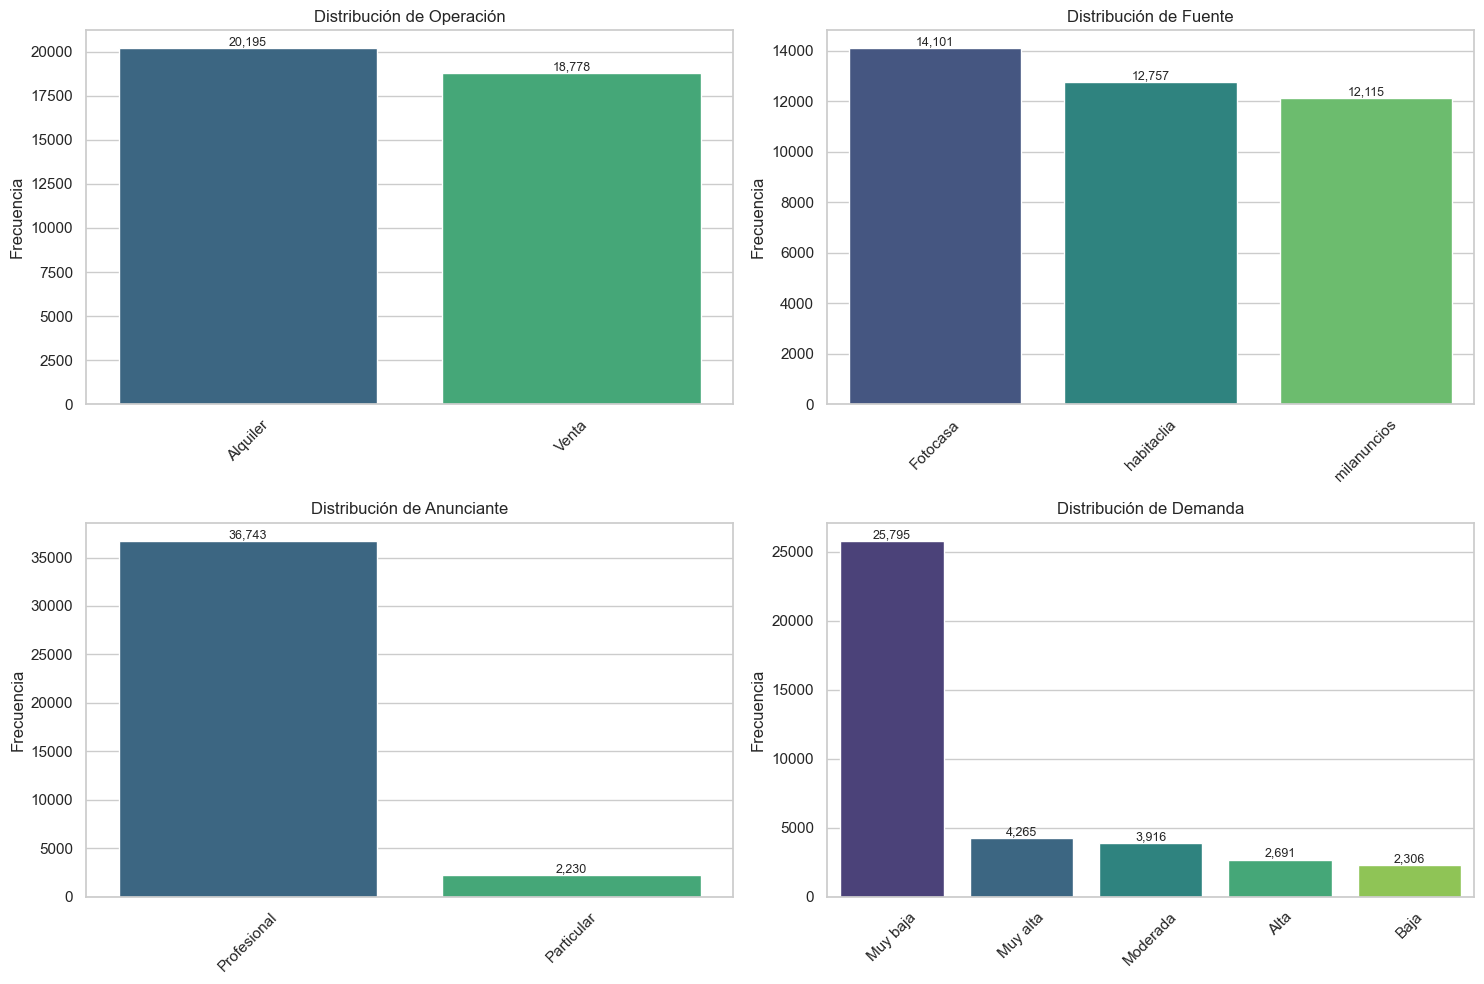

In [15]:
# Gráficos - Variables categóricas principales
pinta_distribucion_categoricas(df_limpio, ['Operación', 'Fuente', 'Anunciante', 'Demanda'], mostrar_valores=True)

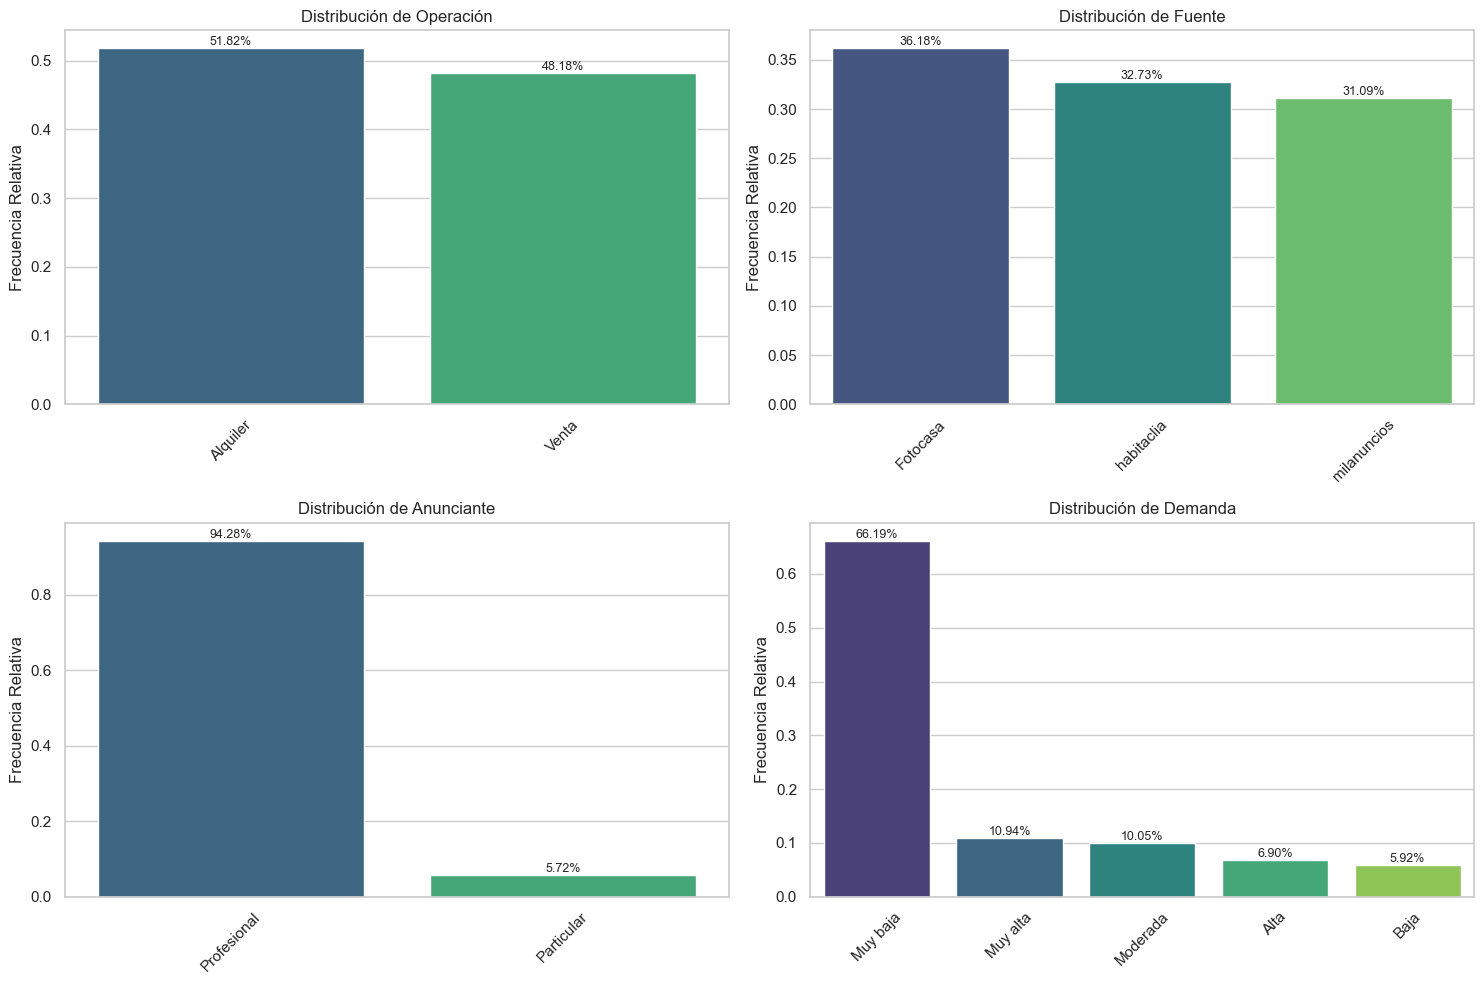

In [16]:
# Gráficos con frecuencias relativas (%)
pinta_distribucion_categoricas(df_limpio, ['Operación', 'Fuente', 'Anunciante', 'Demanda'], 
                                relativa=True, mostrar_valores=True)

# Conclusiones #
* Operación: Dataset equilibrado (51.67% ventas vs 48.33% alquiler). Incluso para alquiler se usa inmobilaria? Analizar por operacion
* Fuente:Distribución más o menos equilibrada, siendo Fotocasa la fuente con mayor % de publicaciones (36.17%), seguido de Habitaclia (32.71%) y MilAnuncios (31.12%). Dentro de las fuentes, ver que % de profesionales/particulares publican viviendas en estos portales.
* Anunciante: El mercado esta muy profesionalizado, 94.24% de los anunciantes son profesioanles mientras que 5.76% particulares.
* Demanda: 72,14% de los pisos tienen baja demanda (66.24% + 5.90%), lo que puede indicar que las viviendas están publicadas a precios por encima de lo que la gente está dispuesta a pagar, que hay okupas, que los anuncios están incompletos (faltan imagenes o las imagenes incluidas de baja calidad/no muestra el interior de la vivienda) y por eso no reciben interés. 

**Analisis variables binarias** (también son categoricas)

In [17]:
# Frecuencias absolutas y relativas para variables binarias
binarias = ['Ascensor', 'Aire acondicionado', 'Garaje', 'Trastero', 
            'Terraza', 'Piscina', 'Zonas verdes', 'Zona deportiva']

for var in binarias:
    print(f"{'='*50}")
    print(f"{var.upper()}")
    print(f"{'='*50}")
    freq_abs = df_limpio[var].value_counts()
    freq_rel = (freq_abs / len(df_limpio) * 100).round(2)
    resumen = pd.DataFrame({'Absoluta': freq_abs, 'Relativa (%)': freq_rel})
    print(resumen.to_string())
    print("\n")

ASCENSOR
          Absoluta  Relativa (%)
Ascensor                        
Sí           28317         72.66
No           10656         27.34


AIRE ACONDICIONADO
                    Absoluta  Relativa (%)
Aire acondicionado                        
Sí                     26130         67.05
No                     12843         32.95


GARAJE
        Absoluta  Relativa (%)
Garaje                        
No         28882         74.11
Sí         10091         25.89


TRASTERO
          Absoluta  Relativa (%)
Trastero                        
No           30063         77.14
Sí            8910         22.86


TERRAZA
         Absoluta  Relativa (%)
Terraza                        
No          33495         85.94
Sí           5478         14.06


PISCINA
         Absoluta  Relativa (%)
Piscina                        
No          31082         79.75
Sí           7891         20.25


ZONAS VERDES
              Absoluta  Relativa (%)
Zonas verdes                        
No               31034   

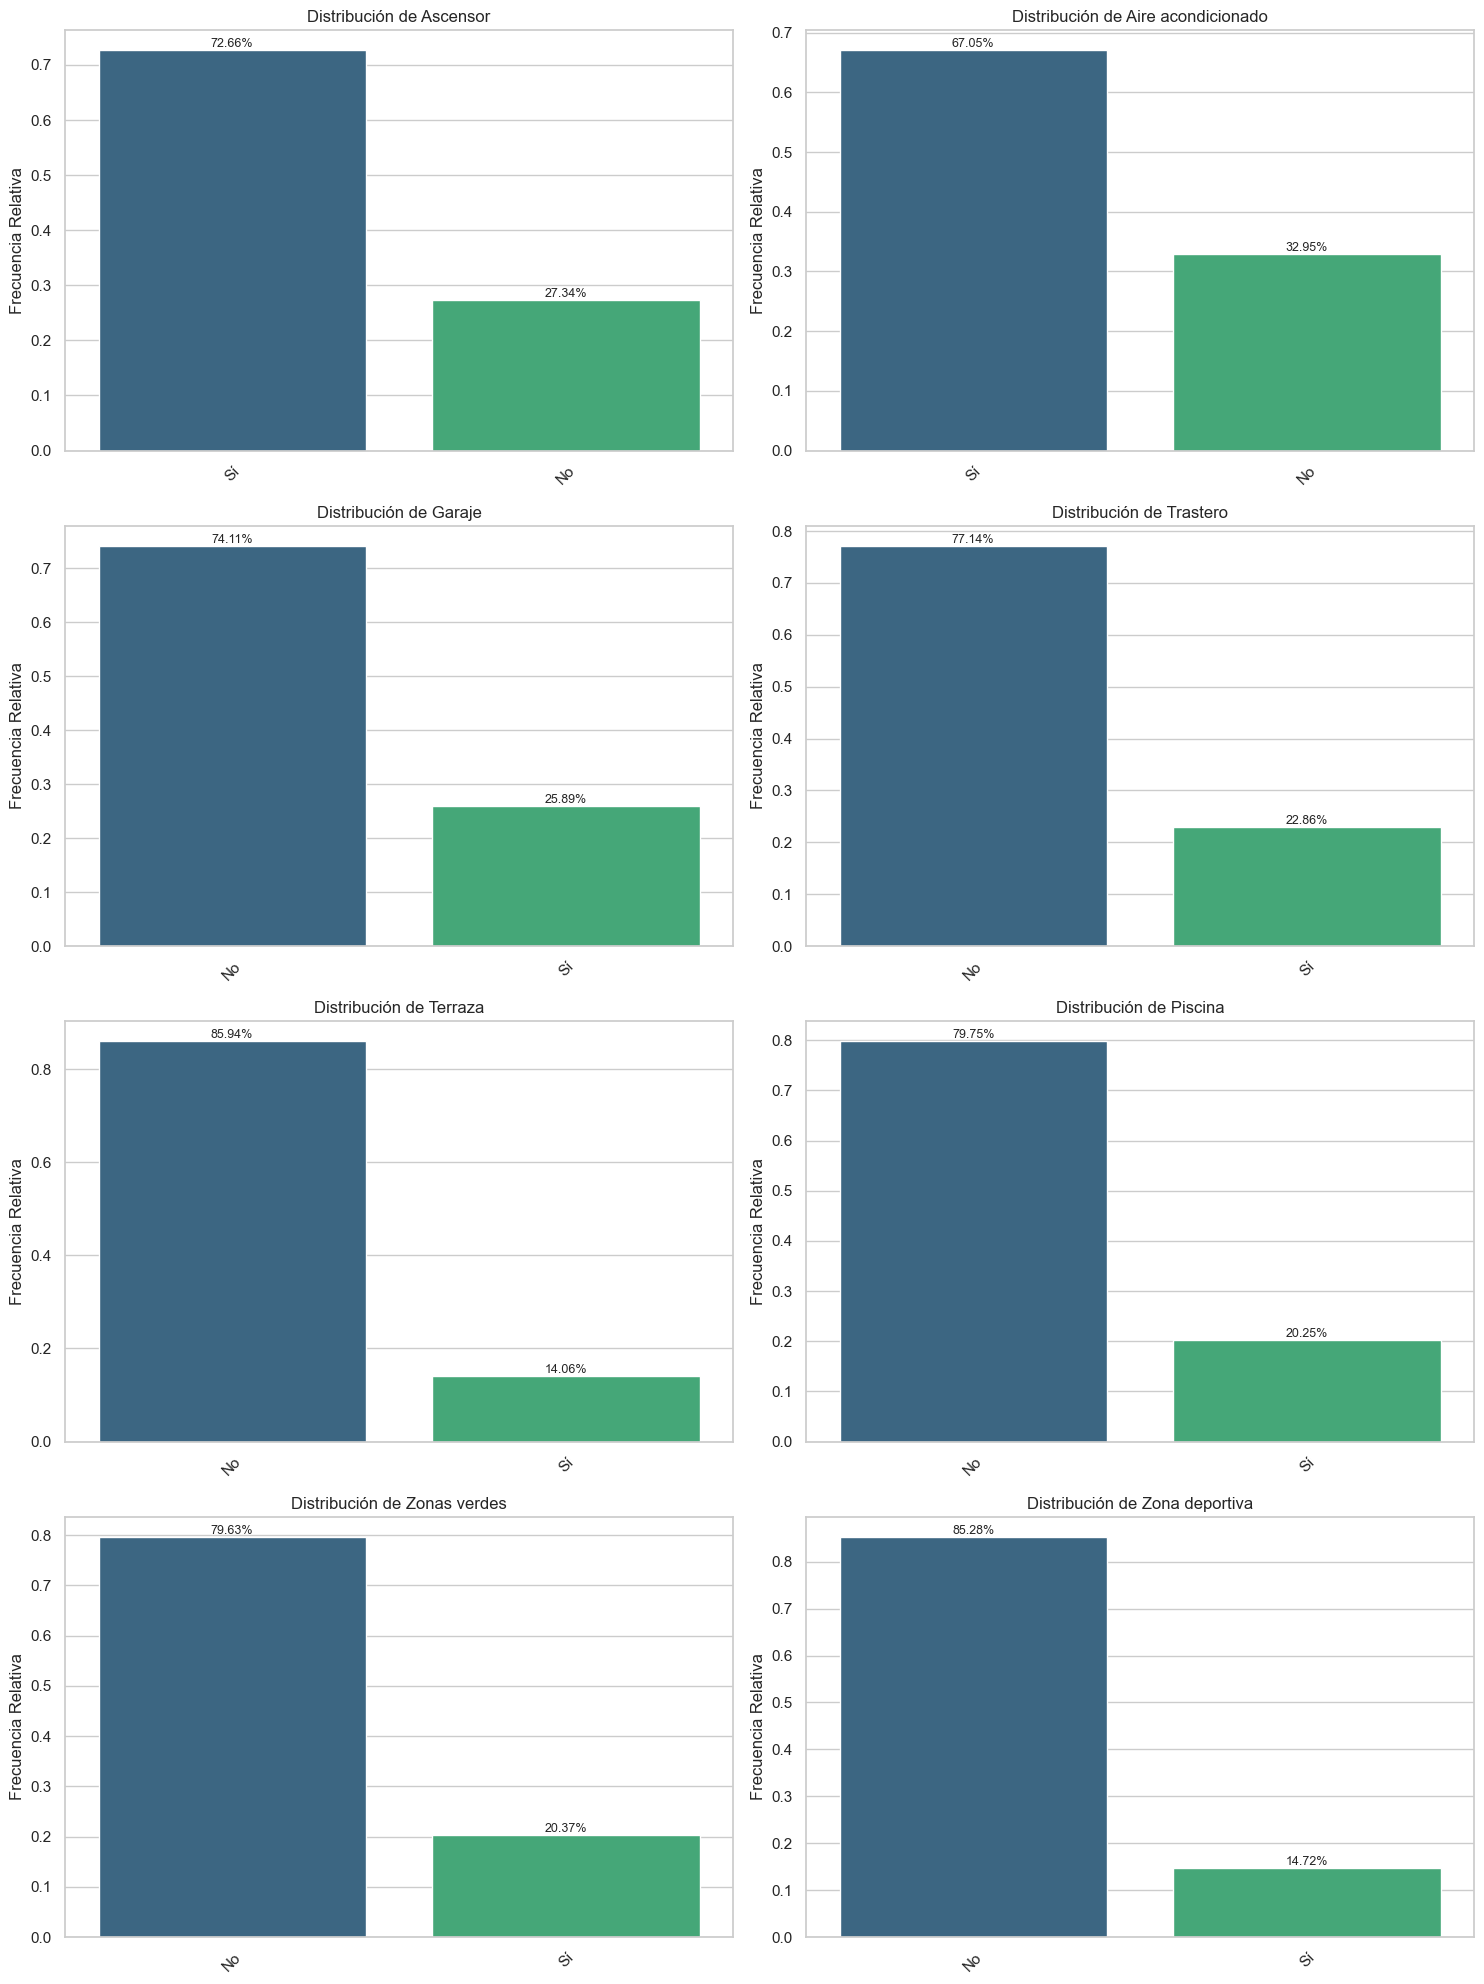

In [18]:
# Gráficos de frecuencias relativas
pinta_distribucion_categoricas(df_limpio, binarias, relativa=True, mostrar_valores=True)

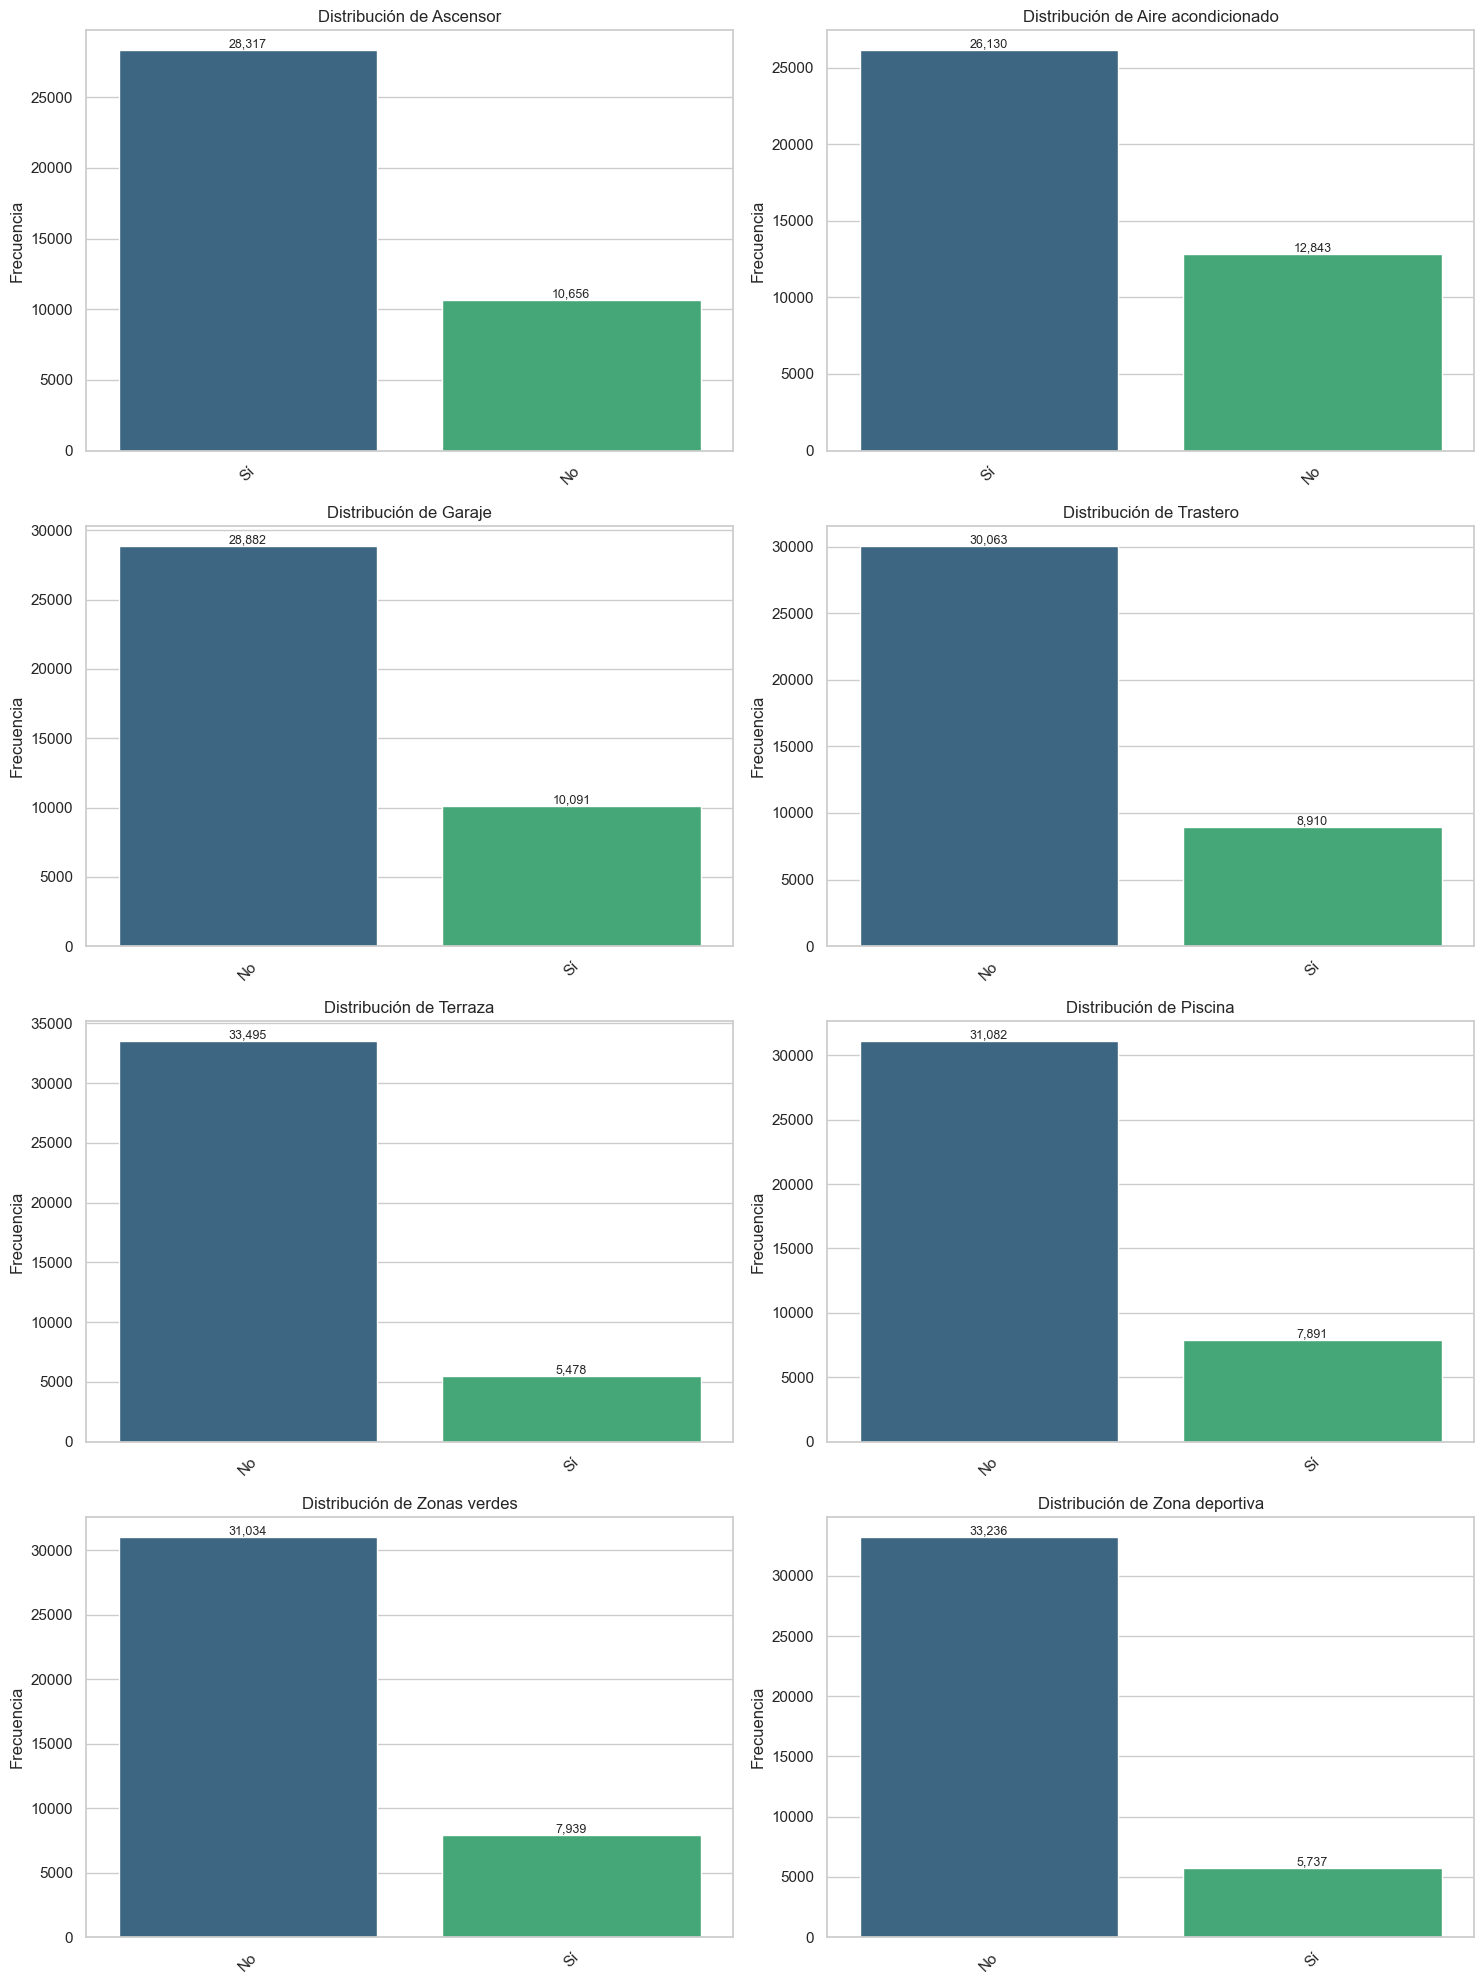

In [19]:
# Frecuencias relativas
pinta_distribucion_categoricas(df_limpio, binarias, mostrar_valores=True)

In [20]:
# Porcentaje de sí para cada amenity
print("AMENITIES - % de inmuebles con cada característica")
print("="*50)

amenities_pct = {}
for amenity in binarias:
    pct_si = (df_limpio[amenity] == 'Sí').sum() / len(df_limpio) * 100
    amenities_pct[amenity] = pct_si
    print(f"{amenity:<20}: {pct_si:>5.1f}%")

# Ordenar de mayor a menor
amenities_sorted = dict(sorted(amenities_pct.items(), key=lambda x: x[1], reverse=True))

AMENITIES - % de inmuebles con cada característica
Ascensor            :  72.7%
Aire acondicionado  :  67.0%
Garaje              :  25.9%
Trastero            :  22.9%
Terraza             :  14.1%
Piscina             :  20.2%
Zonas verdes        :  20.4%
Zona deportiva      :  14.7%


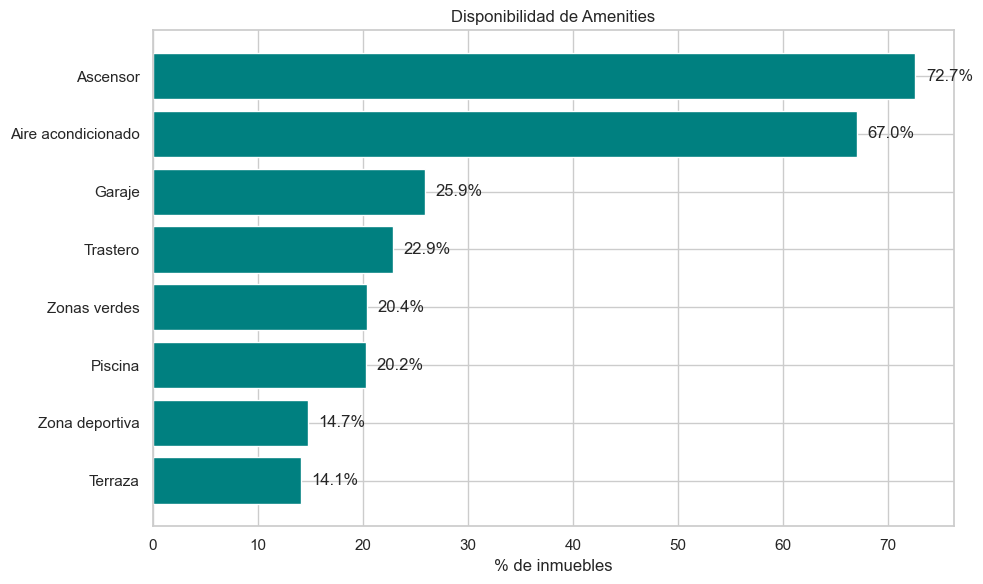

In [21]:
# Gráfico de amenities
fig, ax = plt.subplots(figsize=(10, 6))

amenities_df = pd.Series(amenities_sorted)
bars = ax.barh(amenities_df.index, amenities_df.values, color='teal')
ax.set_xlabel('% de inmuebles')
ax.set_title('Disponibilidad de Amenities')
ax.invert_yaxis()

for bar in bars:
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():.1f}%', va='center')

plt.tight_layout()
plt.show()

**Conclusiones variables binarias**

* Ascensor: amenity más presente en los inmuebles (72.41%). Aun así, 1 de cada 3 viviendas no tiene ascensor, lo que apunta a edificios antiguos o que no hay espacio para un ascensor. ¿Es posible que los pisos en plantas altas tenga mayores descuentos en el precios por esto? (no se puede analizar por falta de datos)
* Aire acondicionado: 66.96% tienen aire acondicionado. Teniendo en cuenta el clima de Valencia esto podría apuntar a viviendas antiguas (en verano el caloret se nota mucho)
* Garaje: Solo 1 de cada 5 viviendas dispone de garaje (26.93%). ¿los inmuebles en venta probablemente estén bastante por encima de este % y los inmuebles en alquiler por debajo?
* Trastero: 22,88% de las viviendas tienen trastero. Podriamos analizarlo por operacion, ¿quizas en Venta este % podría ser mayor?
* Piscina, zonas verdes y zonas deportivas: ¿Quizás dentro de los inmuebles en alquiler haya mucha vivienda antigua y con poco equipamiento comunitario? ¿Quizás dentro de los inmuebles en venta pueda haber viviendas de obra nueva con más presencia de estos servicios? Analizar según operacion. 
* Terraza: Hay muchas viviendas sin terraza (85.90%). Podemos intentar explorar si existen diferencias entre viviendas en venta y en alquiler. 

**Variables numericas**

In [22]:
# Funciones de visualización
def plot_boxplots_por_operacion(df, columns):
    "Boxplots SEPARADOS por operación, con filtros de outliers y mediana visible"
    
    df_alquiler = df[df['Operación'] == 'Alquiler'].copy()
    df_venta = df[df['Operación'] == 'Venta'].copy()
    
    # Filtrar outliers extremos (errores de datos)
    df_alquiler = df_alquiler[df_alquiler['Dormitorios'] <= 10]
    df_alquiler = df_alquiler[df_alquiler['Baños'] <= 10]
    df_alquiler = df_alquiler[df_alquiler['Superficie'] <= 500]
    df_alquiler = df_alquiler[df_alquiler['Precio unitario'] > 0]
    
    df_venta = df_venta[df_venta['Dormitorios'] <= 10]
    df_venta = df_venta[df_venta['Baños'] <= 10]
    df_venta = df_venta[df_venta['Superficie'] <= 500]
    df_venta = df_venta[df_venta['Precio unitario'] > 0]
    df_venta = df_venta[df_venta['Precio'] <= 2000000]
    
    num_cols = len(columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    
    # ALQUILER
    print("=" * 70)
    print("BOXPLOTS - ALQUILER")
    print("=" * 70)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        data = df_alquiler[column].dropna()
        sns.boxplot(x=data, ax=axes[i], color='steelblue')
        
        mediana = data.median()
        axes[i].axvline(mediana, color='red', linestyle='--', linewidth=2)
        axes[i].set_title(f'{column} - ALQUILER (Mediana: {mediana:,.1f})')
        axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # VENTA
    print("=" * 70)
    print("BOXPLOTS - VENTA")
    print("=" * 70)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        data = df_venta[column].dropna()
        sns.boxplot(x=data, ax=axes[i], color='coral')
        
        mediana = data.median()
        axes[i].axvline(mediana, color='red', linestyle='--', linewidth=2)
        axes[i].set_title(f'{column} - VENTA (Mediana: {mediana:,.1f})')
        axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


def plot_histogramas_por_operacion(df):
    "Histogramas de Precio y €/m² separados por operación"
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # ALQUILER
    df_alq = df[df['Operación'] == 'Alquiler'].copy()
    df_alq = df_alq[(df_alq['Precio'] > 0) & (df_alq['Precio'] < df_alq['Precio'].quantile(0.99))]
    df_alq = df_alq[(df_alq['Precio unitario'] > 0) & (df_alq['Precio unitario'] < df_alq['Precio unitario'].quantile(0.99))]
    
    sns.histplot(df_alq['Precio'], kde=True, ax=axes[0, 0], color='steelblue', bins=50)
    mediana_alq = df_alq['Precio'].median()
    axes[0, 0].axvline(mediana_alq, color='red', linestyle='--', linewidth=2)
    axes[0, 0].set_title(f"Precio ALQUILER (Mediana: {mediana_alq:,.0f}€/mes)")
    axes[0, 0].set_xlabel('Precio (€/mes)')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    sns.histplot(df_alq['Precio unitario'], kde=True, ax=axes[0, 1], color='steelblue', bins=50)
    mediana_alq_unit = df_alq['Precio unitario'].median()
    axes[0, 1].axvline(mediana_alq_unit, color='red', linestyle='--', linewidth=2)
    axes[0, 1].set_title(f"€/m² ALQUILER (Mediana: {mediana_alq_unit:.1f}€)")
    axes[0, 1].set_xlabel('€/m²')
    axes[0, 1].set_ylabel('Frecuencia')
    
    # VENTA
    df_venta = df[df['Operación'] == 'Venta'].copy()
    df_venta = df_venta[(df_venta['Precio'] > 0) & (df_venta['Precio'] < df_venta['Precio'].quantile(0.99))]
    df_venta = df_venta[(df_venta['Precio unitario'] > 0) & (df_venta['Precio unitario'] < df_venta['Precio unitario'].quantile(0.99))]
    
    sns.histplot(df_venta['Precio'], kde=True, ax=axes[1, 0], color='coral', bins=50)
    mediana_venta = df_venta['Precio'].median()
    axes[1, 0].axvline(mediana_venta, color='red', linestyle='--', linewidth=2)
    axes[1, 0].set_title(f"Precio VENTA (Mediana: {mediana_venta:,.0f}€)")
    axes[1, 0].set_xlabel('Precio (€)')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    sns.histplot(df_venta['Precio unitario'], kde=True, ax=axes[1, 1], color='coral', bins=50)
    mediana_venta_unit = df_venta['Precio unitario'].median()
    axes[1, 1].axvline(mediana_venta_unit, color='red', linestyle='--', linewidth=2)
    axes[1, 1].set_title(f"€/m² VENTA (Mediana: {mediana_venta_unit:,.0f}€)")
    axes[1, 1].set_xlabel('€/m²')
    axes[1, 1].set_ylabel('Frecuencia')
    axes[1, 1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

In [23]:
# Estadísticas por Operación
print("ALQUILER")
print("="*60)
display(df_limpio[df_limpio['Operación'] == 'Alquiler'][numericas].describe().round(2))

print("\nVENTA")
print("="*60)
display(df_limpio[df_limpio['Operación'] == 'Venta'][numericas].describe().round(2))

ALQUILER


,Precio,Precio unitario,Superficie,Dormitorios,Baños
count,20195.00,20195.00,20195.00,19730.00,19161.00
mean,1498.04,16.39,94.92,2.57,1.53
std,648.15,6.46,38.97,1.03,0.59
min,1.00,1.00,1.00,1.00,1.00
25%,1100.00,12.00,70.00,2.00,1.00
50%,1400.00,15.00,90.00,3.00,1.00
75%,1700.00,19.00,112.00,3.00,2.00
max,12000.00,100.00,413.00,8.00,7.00



VENTA


,Precio,Precio unitario,Superficie,Dormitorios,Baños
count,18778.00,18778.00,18778.00,18059.00,18070.00
mean,346910.47,3165.12,107.98,2.99,1.56
std,270436.73,1408.39,53.60,1.06,0.71
min,1000.00,12.00,17.00,1.00,1.00
25%,195000.00,2283.00,76.00,2.00,1.00
50%,275000.00,2964.00,95.00,3.00,1.00
75%,390000.00,3818.00,120.00,4.00,2.00
max,3500000.00,19500.00,500.00,10.00,9.00


BOXPLOTS - ALQUILER


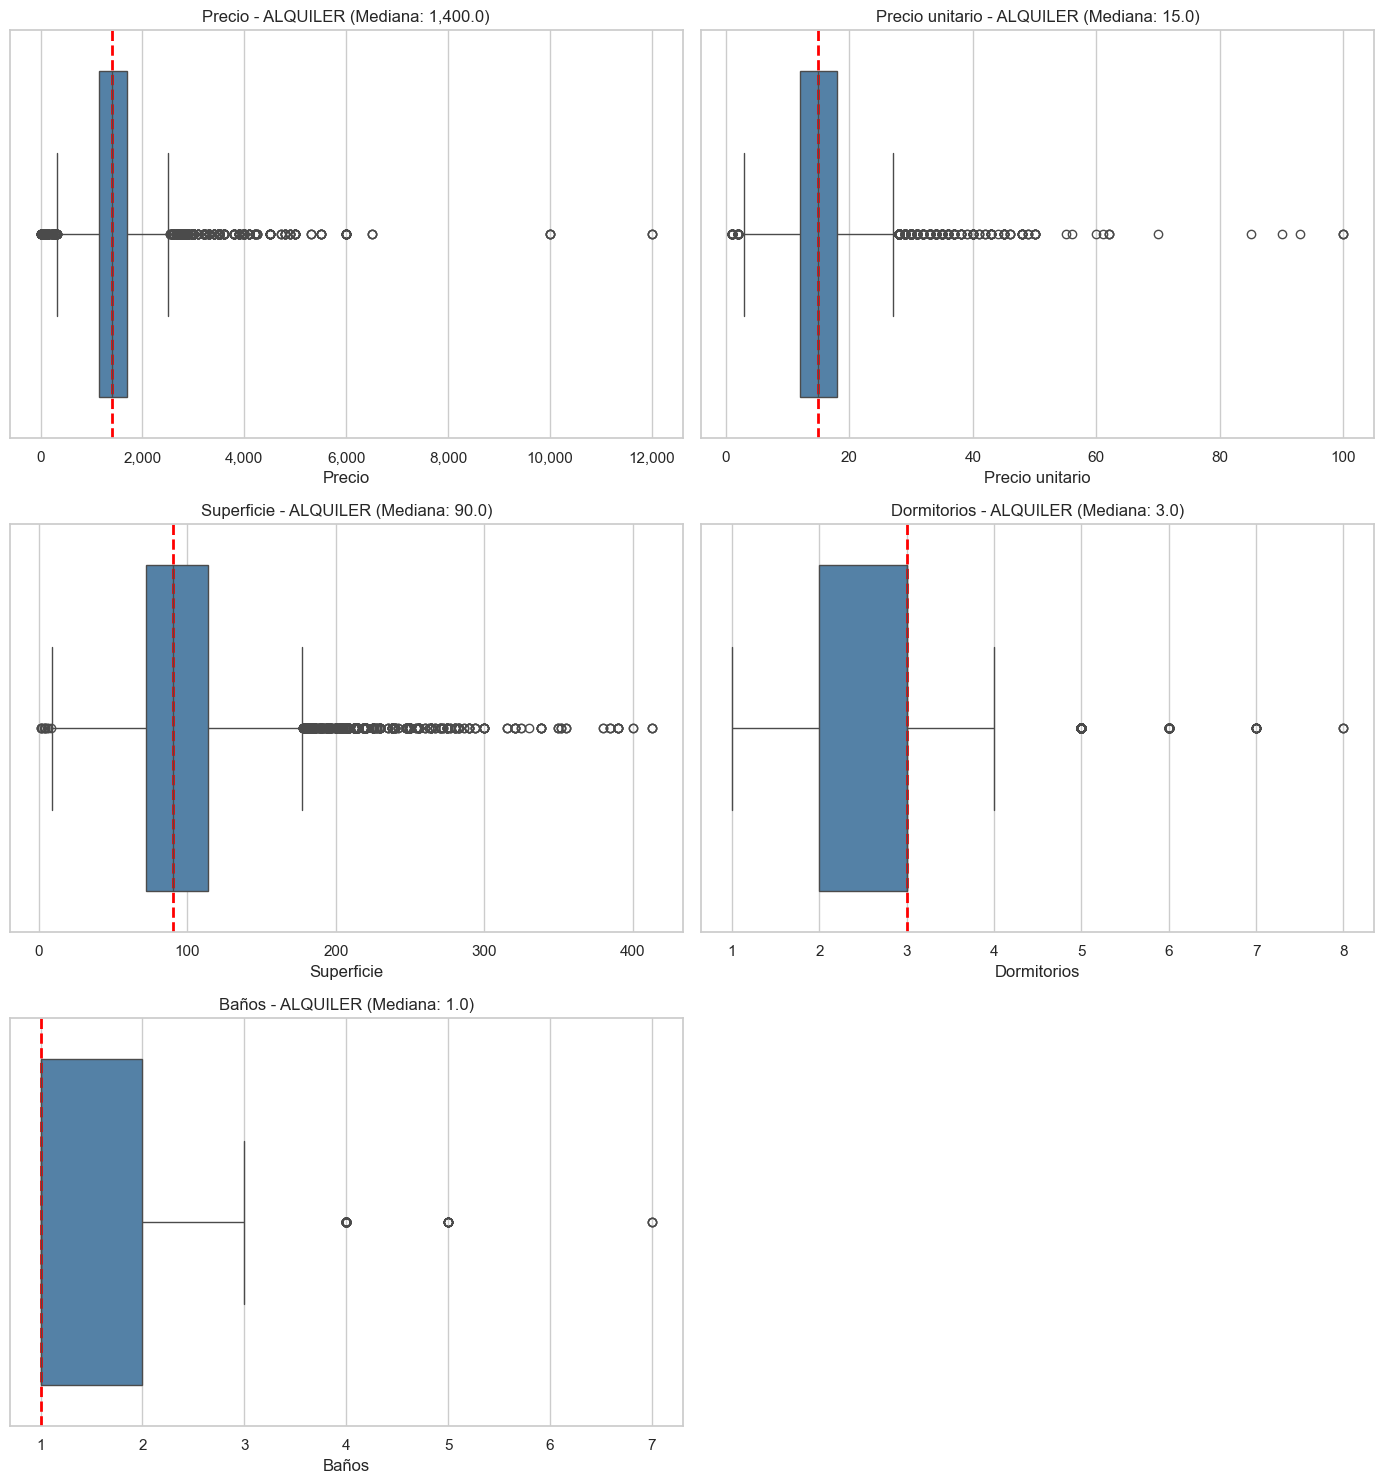

BOXPLOTS - VENTA


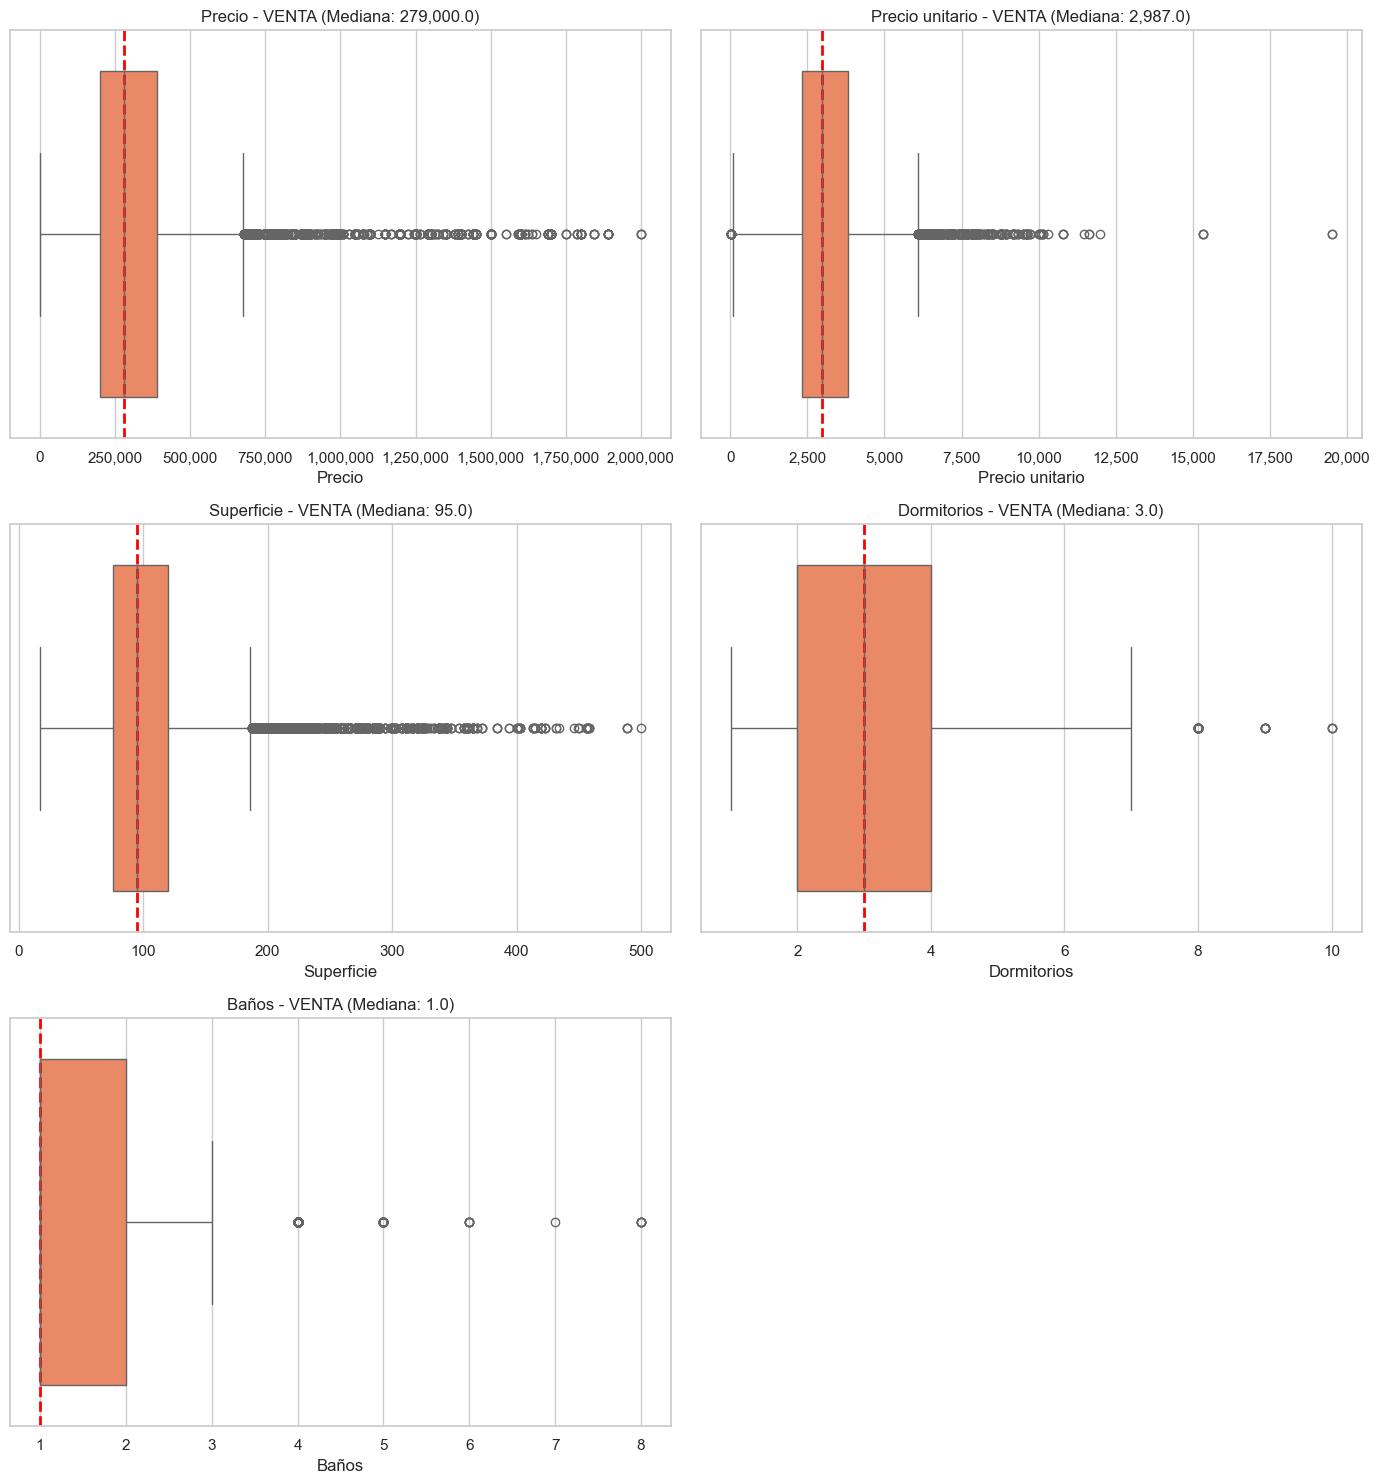

In [24]:
plot_boxplots_por_operacion(df_limpio, numericas)

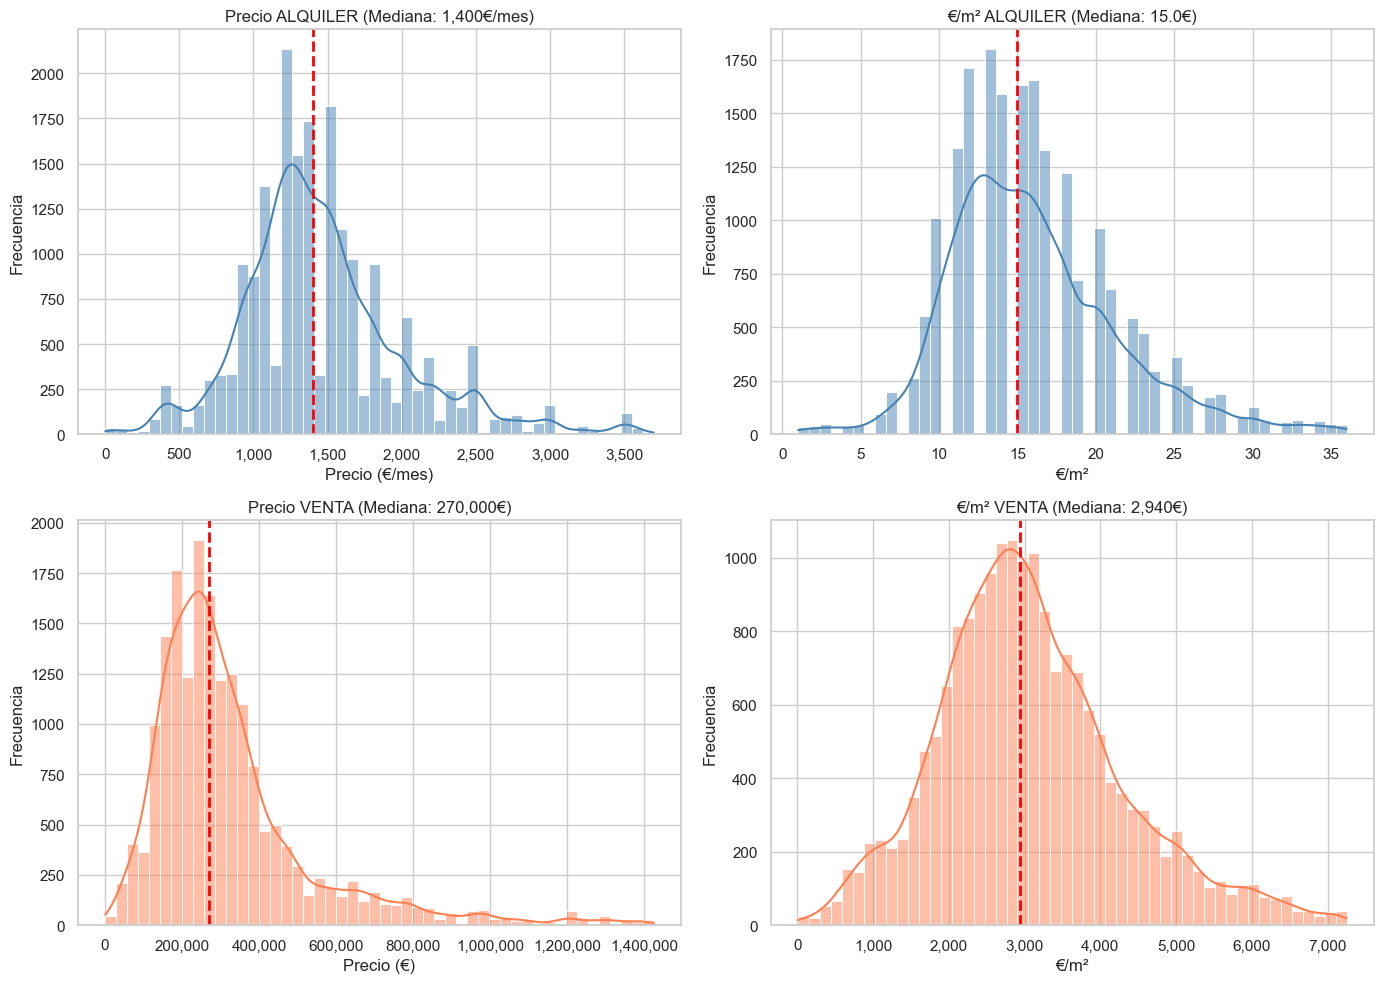

In [25]:
# Histogramas
plot_histogramas_por_operacion(df_limpio)

# CONCLUSIONES #

ALQUILER

* La mayoría de los alquileres están entre 1100€ (Q1) y 1700€ (Q3) al mes.
* La mediana de 1400€ es el alquiler típico. Se paga típicamente 15€ por cada metro cuadrado al mes.
* La mayoría de las viviendas alquiler tienen entre 71 (Q1) y 112 (Q3) metros cuadrados. El piso típico en alquiler tiene 90 metros cuadrados (mediana).
* Lo más común son pisos de 3 habitaciones (mediana).
* La mayoría tienen 1 baño (mediana).

VENTA

* El precio típico de compra es 275000€ (mediana). La mayoría está entre 195000€ (Q1) y 394500€ (Q3).
* Se paga típicamente 2952€ por metro cuadrado en compra.
* El piso típico en venta tiene 95 metros cuadrados (mediana). Las viviendas en venta son ligeramente más grandes (95 vs 90 metros cuadrados en alquiler).
* Lo más común son viviendas de 3 habitaciones (mediana).
* La mayoría tienen 1 baño (mediana).

ANALISIS BIVARIANTE

In [26]:
#Analisis bivariante: Categorica vs Categorica

# Operacion vs Fuente
#Queremos ver si hay diferencias en la proporción de alquiler/venta según el portal.

def bivariante_operacion_fuente(df):
    print("="*70)
    print("OPERACIÓN vs FUENTE")
    print("="*70)
    
    # Tabla de contingencia
    tabla = pd.crosstab(df['Fuente'], df['Operación'], normalize='index') * 100
    print("\nTabla de contingencia (% por fila):")
    print(tabla.round(1))
    
    # Gráfico
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Frecuencias absolutas
    pd.crosstab(df['Fuente'], df['Operación']).plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
    axes[0].set_title('Operación por Fuente (Frecuencia Absoluta)')
    axes[0].set_xlabel('Fuente')
    axes[0].set_ylabel('Número de anuncios')
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].legend(title='Operación')
    
    # Frecuencias relativas
    tabla.plot(kind='bar', ax=axes[1], color=['steelblue', 'coral'])
    axes[1].set_title('Operación por Fuente (Frecuencia Relativa %)')
    axes[1].set_xlabel('Fuente')
    axes[1].set_ylabel('Porcentaje')
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].legend(title='Operación')
    
    plt.tight_layout()
    plt.show()
    
    # Test Chi-cuadrado
    tabla_abs = pd.crosstab(df['Fuente'], df['Operación'])
    chi2, p_value, dof, expected = stats.chi2_contingency(tabla_abs)
    
    print(f"\n📊 TEST CHI-CUADRADO:")
    print(f"   Chi² = {chi2:.2f}")
    print(f"   p-value = {p_value:.4f}")
    print(f"   Grados de libertad = {dof}")
    
    if p_value < 0.05:
        print("   ✅ CONCLUSIÓN: Hay relación significativa entre Fuente y Operación (p < 0.05)")
    else:
        print("   ❌ CONCLUSIÓN: No hay relación significativa entre Fuente y Operación (p >= 0.05)")

OPERACIÓN vs FUENTE

Tabla de contingencia (% por fila):
Operación    Alquiler  Venta
Fuente                      
Fotocasa         52.4   47.6
habitaclia       50.9   49.1
milanuncios      52.1   47.9


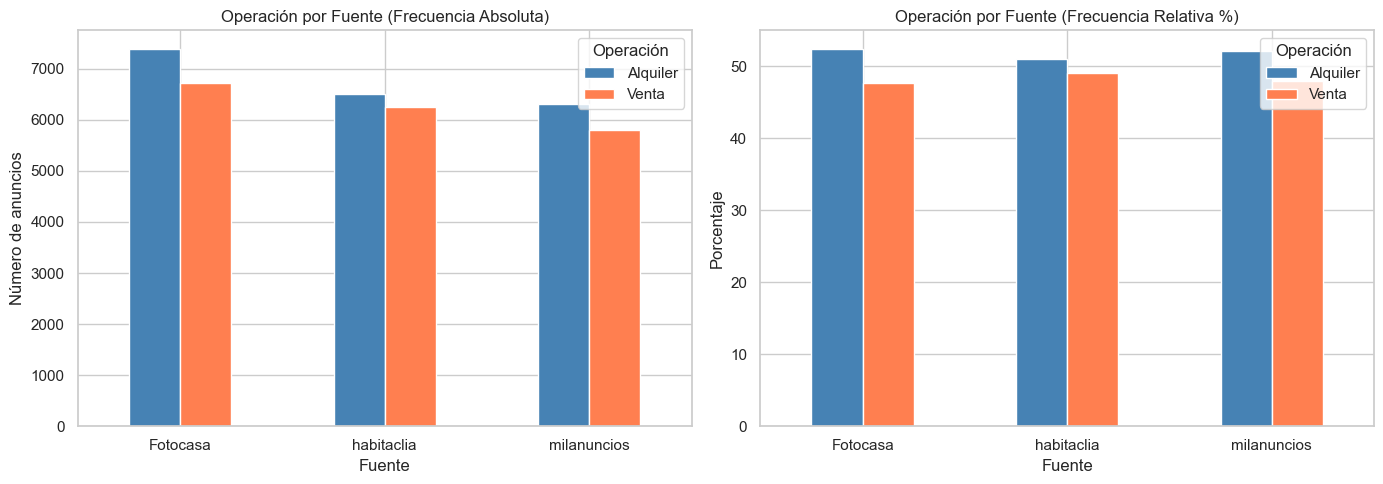


📊 TEST CHI-CUADRADO:
   Chi² = 6.03
   p-value = 0.0490
   Grados de libertad = 2
   ✅ CONCLUSIÓN: Hay relación significativa entre Fuente y Operación (p < 0.05)


In [27]:
bivariante_operacion_fuente(df_limpio)

In [28]:
# Operacion vs Anunciante
# Queremos ver si los profesionales y particulares tienen diferentes proporciones de alquiler/venta. 

def bivariante_operacion_anunciante(df):
    print("\n" + "="*70)
    print("OPERACIÓN vs ANUNCIANTE")
    print("="*70)
    
    # Tabla de contingencia
    tabla = pd.crosstab(df['Anunciante'], df['Operación'], normalize='index') * 100
    print("\nTabla de contingencia (% por fila):")
    print(tabla.round(1))
    
    # Gráfico
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    pd.crosstab(df['Anunciante'], df['Operación']).plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
    axes[0].set_title('Operación por Anunciante (Frecuencia Absoluta)')
    axes[0].set_xlabel('Anunciante')
    axes[0].set_ylabel('Número de anuncios')
    axes[0].tick_params(axis='x', rotation=0)
    
    tabla.plot(kind='bar', ax=axes[1], color=['steelblue', 'coral'])
    axes[1].set_title('Operación por Anunciante (Frecuencia Relativa %)')
    axes[1].set_xlabel('Anunciante')
    axes[1].set_ylabel('Porcentaje')
    axes[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Test Chi-cuadrado
    tabla_abs = pd.crosstab(df['Anunciante'], df['Operación'])
    chi2, p_value, dof, expected = stats.chi2_contingency(tabla_abs)
    
    print(f"\n📊 TEST CHI-CUADRADO:")
    print(f"   Chi² = {chi2:.2f}")
    print(f"   p-value = {p_value:.6f}")
    
    if p_value < 0.05:
        print("   ✅ CONCLUSIÓN: Hay relación significativa entre Anunciante y Operación")
    else:
        print("   ❌ CONCLUSIÓN: No hay relación significativa")


OPERACIÓN vs ANUNCIANTE

Tabla de contingencia (% por fila):
Operación    Alquiler  Venta
Anunciante                  
Particular       68.0   32.0
Profesional      50.8   49.2


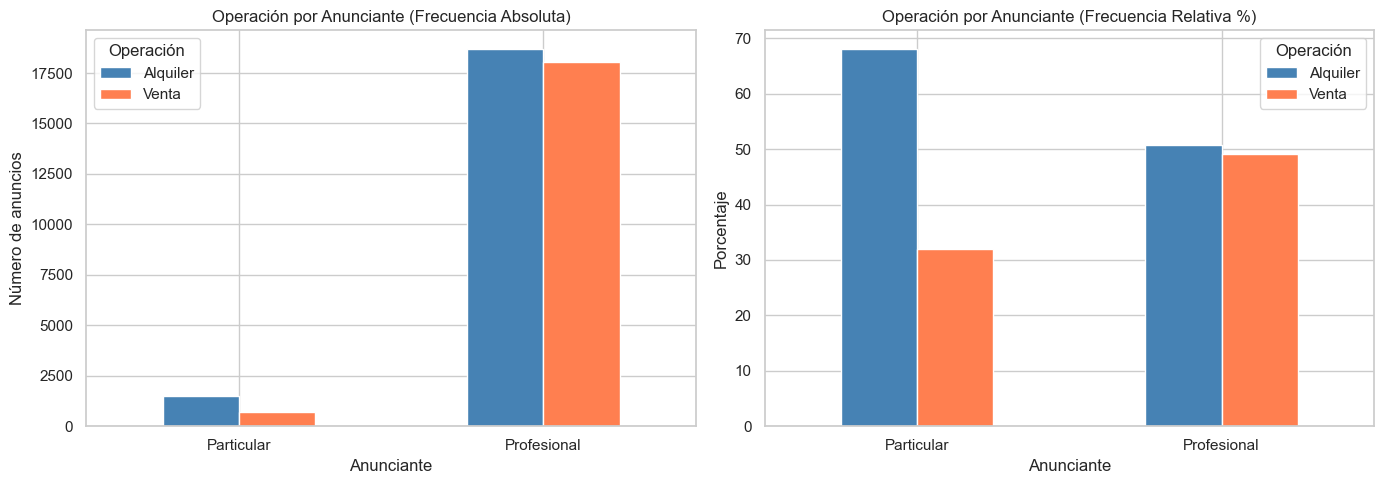


📊 TEST CHI-CUADRADO:
   Chi² = 248.22
   p-value = 0.000000
   ✅ CONCLUSIÓN: Hay relación significativa entre Anunciante y Operación


In [29]:
bivariante_operacion_anunciante(df_limpio)

In [30]:
# Demanda vs operacion
#  ¿El alquiler tiene diferente nivel de demanda que la venta?

def bivariante_demanda_operacion(df):
    print("\n" + "="*70)
    print("="*70)
    
    # Ordenar demanda
    orden_demanda = ['Muy baja', 'Baja', 'Moderada', 'Alta', 'Muy alta']
    df['Demanda'] = pd.Categorical(df['Demanda'], categories=orden_demanda, ordered=True)
    
    # Tabla de contingencia
    tabla = pd.crosstab(df['Operación'], df['Demanda'], normalize='index') * 100
    print("\nTabla de contingencia (% por fila):")
    print(tabla.round(1))
    
    # Gráfico
    fig, ax = plt.subplots(figsize=(12, 6))
    tabla.plot(kind='bar', ax=ax, colormap='RdYlGn')
    ax.set_title('Nivel de Demanda por Operación')
    ax.set_xlabel('Operación')
    ax.set_ylabel('Porcentaje')
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Demanda', bbox_to_anchor=(1.02, 1))
    
    plt.tight_layout()
    plt.show()
    
    # Test Chi-cuadrado
    tabla_abs = pd.crosstab(df['Operación'], df['Demanda'])
    chi2, p_value, dof, expected = stats.chi2_contingency(tabla_abs)
    
    print(f"\n📊 TEST CHI-CUADRADO:")
    print(f"   Chi² = {chi2:.2f}")
    print(f"   p-value = {p_value:.6f}")
    
    if p_value < 0.05:
        print("   ✅ CONCLUSIÓN: Hay relación significativa entre Demanda y Operación")




Tabla de contingencia (% por fila):
Demanda    Muy baja  Baja  Moderada  Alta  Muy alta
Operación                                          
Alquiler       63.0   3.0       8.0   9.4      16.6
Venta          69.7   9.0      12.3   4.2       4.8


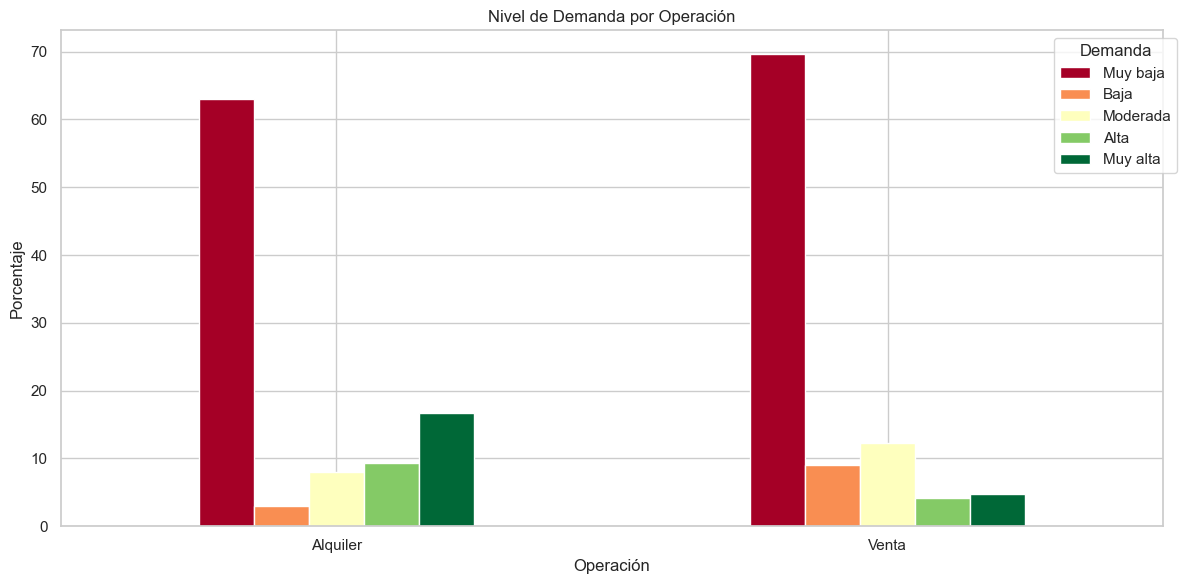


📊 TEST CHI-CUADRADO:
   Chi² = 2454.52
   p-value = 0.000000
   ✅ CONCLUSIÓN: Hay relación significativa entre Demanda y Operación


In [31]:
bivariante_demanda_operacion(df_limpio)

El ALQUILER tiene más demanda que la VENTA:

* 26% de alquileres tienen demanda alta/muy alta
* Solo 9% de ventas tienen demanda alta/muy alta

La VENTA tiene más sobreoferta:
* 69,8% de ventas tienen demanda "Muy Baja", lo cual indica que hay más pisos en venta de los que la gente quier comprar.

PRECIO UNITARIO vs DISTRITO

📈 TOP 10 DISTRITOS MÁS CAROS:
    1. L'Eixample               : 4,825€/m²
    2. La Patacona              : 4,625€/m²
    3. Ciutat Vella             : 4,350€/m²
    4. El Pla del Real          : 3,917€/m²
    5. Extramurs                : 3,500€/m²
    6. Camins al Grau           : 3,274€/m²
    7. Algirós                  : 3,145€/m²
    8. Campanar                 : 3,134€/m²
    9. Quatre Carreres          : 3,123€/m²
   10. La Saïdia                : 2,911€/m²

📉 TOP 10 DISTRITOS MÁS BARATOS:
    1. Borbotó                  : 976€/m²
    2. El Palmar                : 987€/m²
    3. Cases de Bàrcena         : 1,391€/m²
    4. Benifaraig               : 1,440€/m²
    5. La Torre                 : 1,530€/m²
    6. El Forn d'Alcedo         : 1,536€/m²
    7. Zona Cantereria          : 1,704€/m²
    8. El Castellar i l'Oliverar: 1,821€/m²
    9. Benimàmet                : 1,853€/m²
   10. Poble Nou                : 1,869€/m²


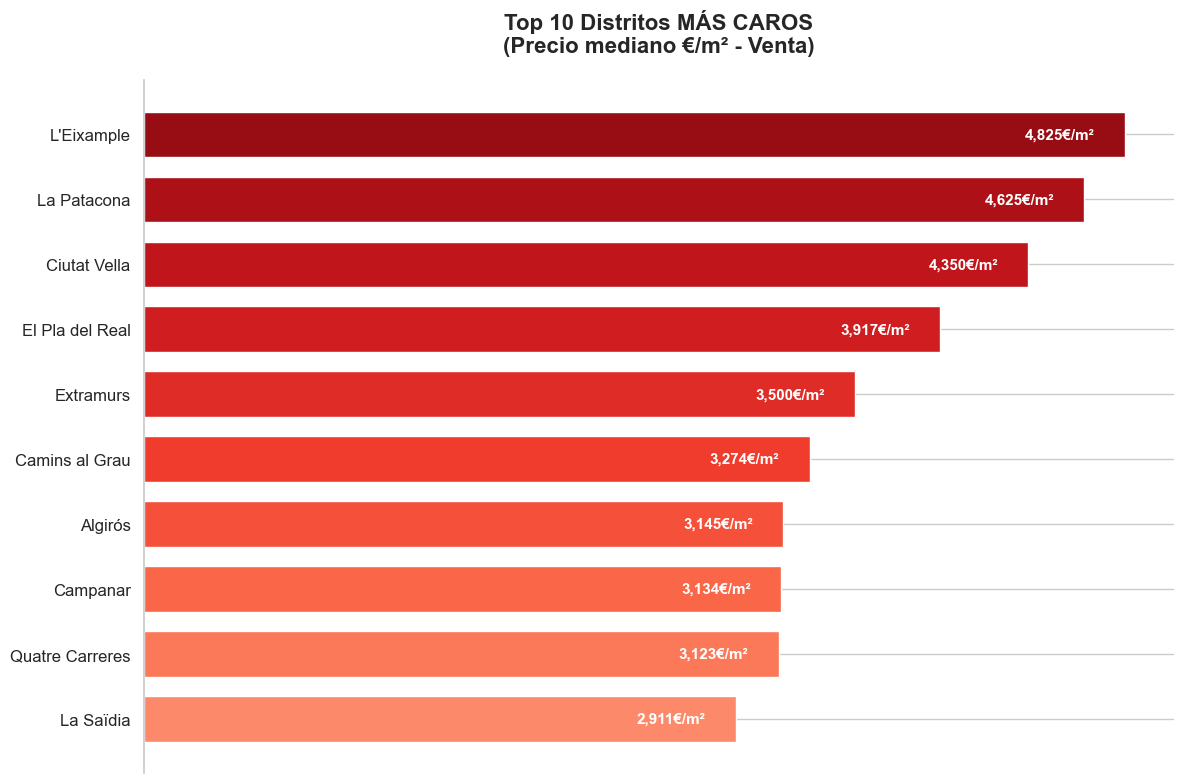

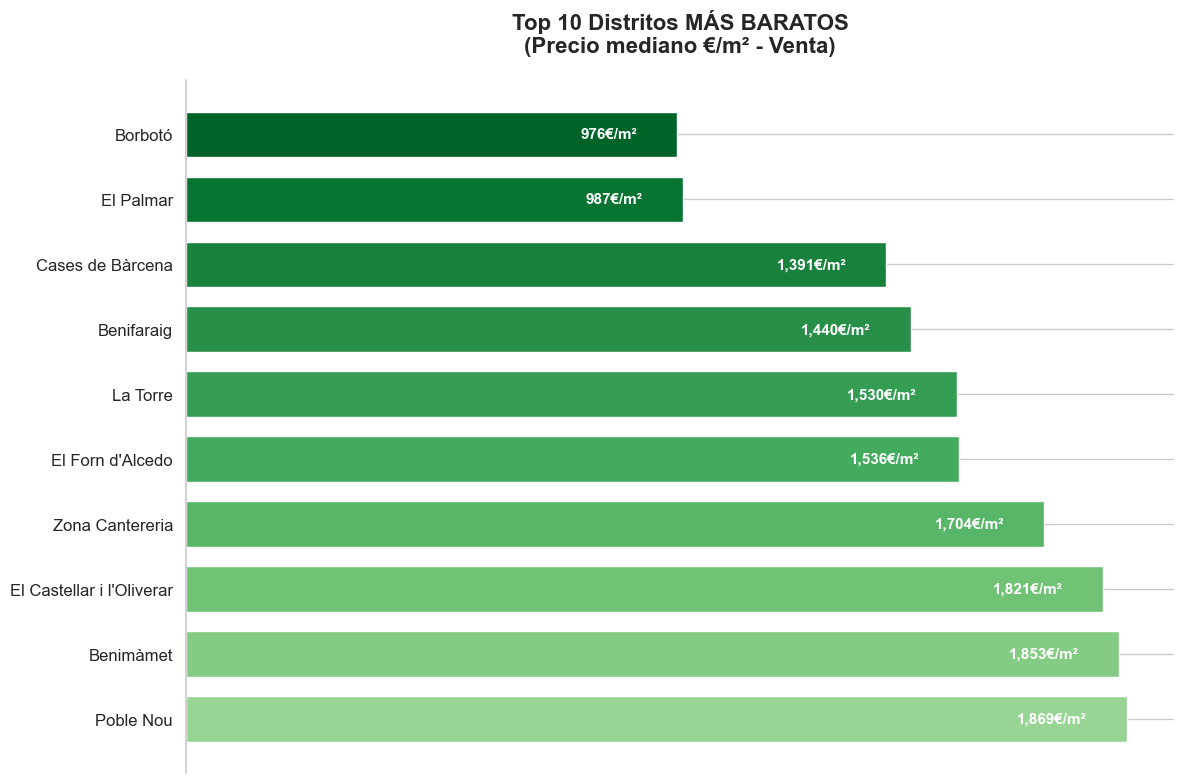

In [32]:
#Analisis bivariante: Categorica vs Numerica

#Precio unitario vs Distrito (top 10 más caros y baratos)

def bivariante_precio_distrito(df):
    print("="*70)
    print("PRECIO UNITARIO vs DISTRITO")
    print("="*70)
    
    # Solo venta y precios válidos
    df_venta = df[(df['Operación'] == 'Venta') & (df['Precio unitario'] > 0)]
    
    # Calcular mediana por distrito
    precio_por_distrito = df_venta.groupby('Distrito')['Precio unitario'].median().sort_values(ascending=False)
    
    # Top 10 más caros y más baratos
    top_caros = precio_por_distrito.head(10)
    top_baratos = precio_por_distrito.tail(10).sort_values(ascending=False)
    
    # Imprimir datos
    print("\n📈 TOP 10 DISTRITOS MÁS CAROS:")
    for i, (d, p) in enumerate(top_caros.items(), 1):
        print(f"   {i:2}. {d:25}: {p:,.0f}€/m²")
    
    print("\n📉 TOP 10 DISTRITOS MÁS BARATOS:")
    for i, (d, p) in enumerate(top_baratos.sort_values().items(), 1):
        print(f"   {i:2}. {d:25}: {p:,.0f}€/m²")
    
    # GRÁFICO TOP 10 MÁS CAROS
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Colores degradados (más caro = más oscuro)
    colores = plt.cm.Reds(np.linspace(0.4, 0.9, 10))[::-1]
    
    # Barras horizontales
    y_pos = range(len(top_caros))
    bars = ax.barh(y_pos, top_caros.values, color=colores, edgecolor='white', height=0.7)
    
    # Etiquetas de precio dentro de las barras
    for i, (bar, valor) in enumerate(zip(bars, top_caros.values)):
        ax.text(valor - 150, bar.get_y() + bar.get_height()/2, 
                f'{valor:,.0f}€/m²', 
                va='center', ha='right', fontsize=11, fontweight='bold', color='white')
    
    # Configuración del eje Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_caros.index, fontsize=12)
    ax.invert_yaxis()  # El más caro arriba
    
    # Eliminar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    
    # Título
    ax.set_title('Top 10 Distritos MÁS CAROS\n(Precio mediano €/m² - Venta)', 
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # GRÁFICO TOP 10 MÁS BARATOS

    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Ordenar de más barato a menos barato
    top_baratos_sorted = top_baratos.sort_values()
    
    # Colores degradados (más barato = más oscuro)
    colores = plt.cm.Greens(np.linspace(0.4, 0.9, 10))[::-1]
    
    # Barras horizontales
    y_pos = range(len(top_baratos_sorted))
    bars = ax.barh(y_pos, top_baratos_sorted.values, color=colores, edgecolor='white', height=0.7)
    
    # Etiquetas de precio dentro de las barras
    for i, (bar, valor) in enumerate(zip(bars, top_baratos_sorted.values)):
        ax.text(valor - 80, bar.get_y() + bar.get_height()/2, 
                f'{valor:,.0f}€/m²', 
                va='center', ha='right', fontsize=11, fontweight='bold', color='white')
    
    # Configuración del eje Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_baratos_sorted.index, fontsize=12)
    ax.invert_yaxis()
    
    # Eliminar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    
    # Título
    ax.set_title('Top 10 Distritos MÁS BARATOS\n(Precio mediano €/m² - Venta)', 
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    

bivariante_precio_distrito(df_limpio)


PRECIO UNITARIO vs BARRIO

📈 TOP 10 BARRIOS MÁS CAROS:
    1. El Pla del Remei                   : 5,537€/m²
    2. Exposició                          : 5,274€/m²
    3. Zona Gran Via                      : 4,957€/m²
    4. Ciutat de les Ciències i de les Arts - Justicia: 4,945€/m²
    5. Sant Francesc                      : 4,798€/m²
    6. La Seu                             : 4,647€/m²
    7. El Mercat                          : 4,518€/m²
    8. Penya - Roja - Avda. Francia       : 4,503€/m²
    9. La Roqueta                         : 4,408€/m²
   10. Russafa                            : 4,305€/m²

📉 TOP 10 BARRIOS MÁS BARATOS:
    1. La Fontsanta                       : 1,969€/m²
    2. Natzaret                           : 2,000€/m²
    3. Tres Forques                       : 2,098€/m²
    4. Orriols                            : 2,123€/m²
    5. Ciutat Fallera                     : 2,293€/m²
    6. La Llum                            : 2,300€/m²
    7. Sant Isidre                   

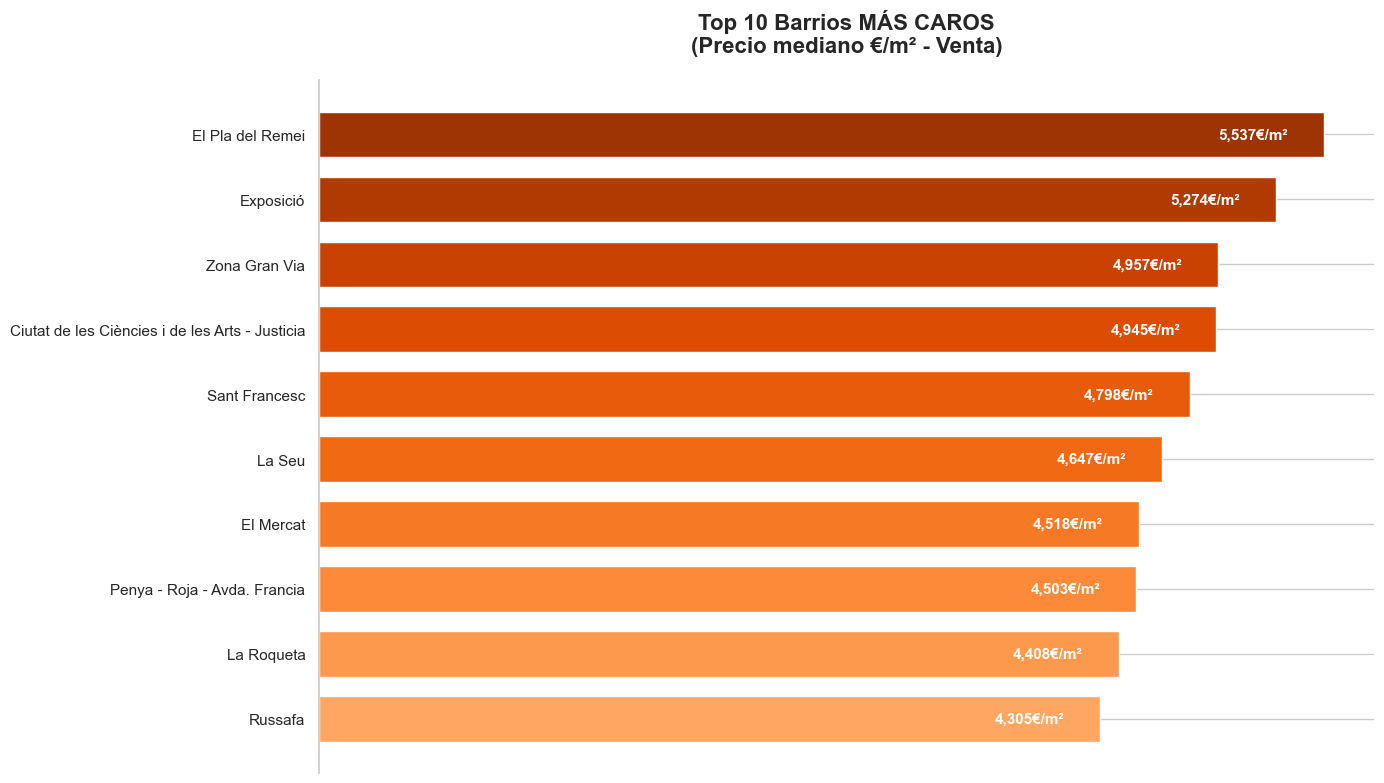

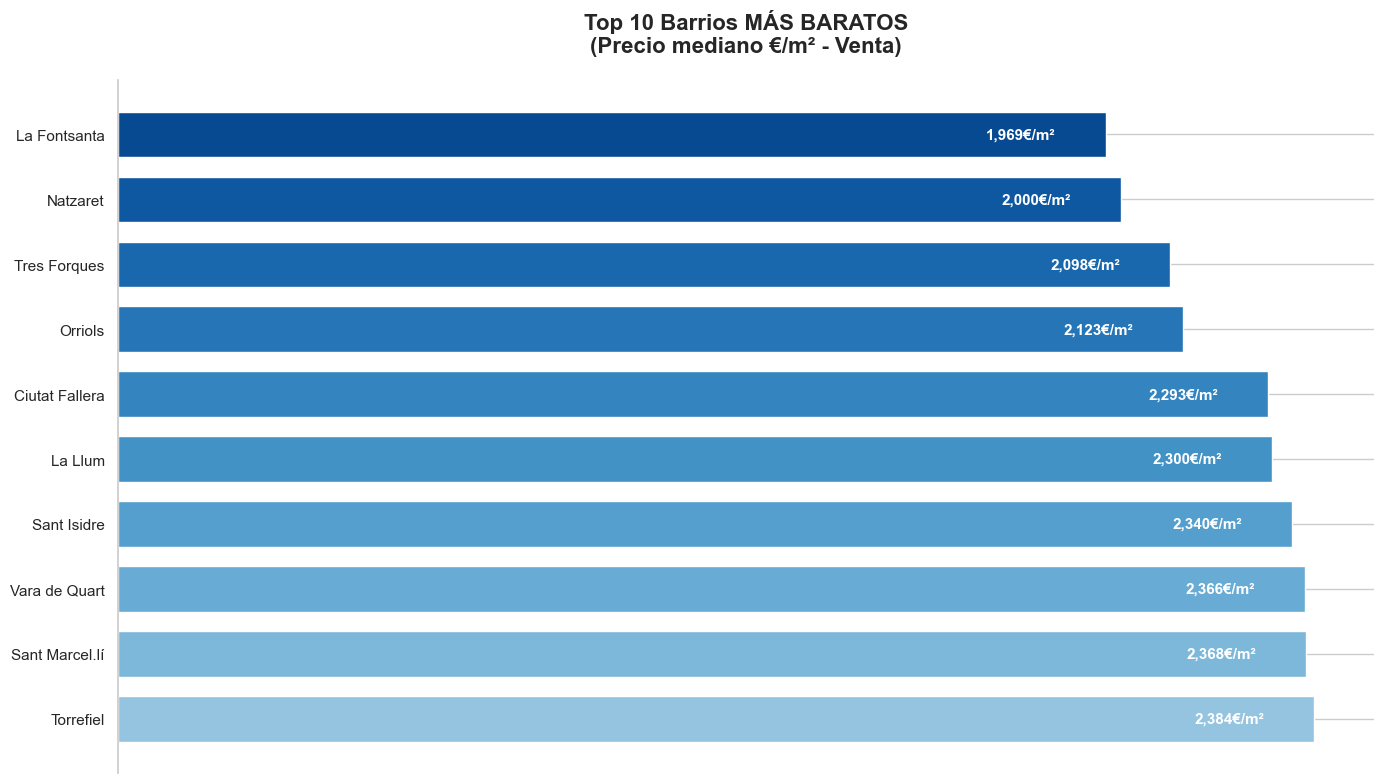

In [33]:
#Precio unitario vs Barrio (top 10 más caros y baratos)

def bivariante_precio_barrio(df):
    print("\n" + "="*70)
    print("PRECIO UNITARIO vs BARRIO")
    print("="*70)
    
    # Solo venta, precios válidos y barrios con datos
    df_venta = df[(df['Operación'] == 'Venta') & 
                  (df['Precio unitario'] > 0) & 
                  (df['Barrio'].notna())]
    
    # Solo barrios con al menos 10 anuncios
    conteo = df_venta.groupby('Barrio').size()
    barrios_validos = conteo[conteo >= 10].index
    df_venta = df_venta[df_venta['Barrio'].isin(barrios_validos)]
    
    # Calcular mediana por barrio
    precio_por_barrio = df_venta.groupby('Barrio')['Precio unitario'].median().sort_values(ascending=False)
    
    # Top 10 más caros y más baratos
    top_caros = precio_por_barrio.head(10)
    top_baratos = precio_por_barrio.tail(10).sort_values(ascending=False)
    
    # Imprimir datos
    print("\n📈 TOP 10 BARRIOS MÁS CAROS:")
    for i, (b, p) in enumerate(top_caros.items(), 1):
        print(f"   {i:2}. {b:35}: {p:,.0f}€/m²")
    
    print("\n📉 TOP 10 BARRIOS MÁS BARATOS:")
    for i, (b, p) in enumerate(top_baratos.sort_values().items(), 1):
        print(f"   {i:2}. {b:35}: {p:,.0f}€/m²")
    
    # GRÁFICO TOP 10 BARRIOS MÁS CAROS
  
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Colores degradados
    colores = plt.cm.Oranges(np.linspace(0.4, 0.9, 10))[::-1]
    
    # Barras horizontales
    y_pos = range(len(top_caros))
    bars = ax.barh(y_pos, top_caros.values, color=colores, edgecolor='white', height=0.7)
    
    # Etiquetas de precio
    for i, (bar, valor) in enumerate(zip(bars, top_caros.values)):
        ax.text(valor - 200, bar.get_y() + bar.get_height()/2, 
                f'{valor:,.0f}€/m²', 
                va='center', ha='right', fontsize=11, fontweight='bold', color='white')
    
    # Configuración
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_caros.index, fontsize=11)
    ax.invert_yaxis()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    
    ax.set_title('Top 10 Barrios MÁS CAROS\n(Precio mediano €/m² - Venta)', 
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    

    # GRÁFICO TOP 10 BARRIOS MÁS BARATOS
   
    fig, ax = plt.subplots(figsize=(14, 8))
    
    top_baratos_sorted = top_baratos.sort_values()
    
    # Colores degradados
    colores = plt.cm.Blues(np.linspace(0.4, 0.9, 10))[::-1]
    
    # Barras horizontales
    y_pos = range(len(top_baratos_sorted))
    bars = ax.barh(y_pos, top_baratos_sorted.values, color=colores, edgecolor='white', height=0.7)
    
    # Etiquetas de precio
    for i, (bar, valor) in enumerate(zip(bars, top_baratos_sorted.values)):
        ax.text(valor - 100, bar.get_y() + bar.get_height()/2, 
                f'{valor:,.0f}€/m²', 
                va='center', ha='right', fontsize=11, fontweight='bold', color='white')
    
    # Configuración
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_baratos_sorted.index, fontsize=11)
    ax.invert_yaxis()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    
    ax.set_title('Top 10 Barrios MÁS BARATOS\n(Precio mediano €/m² - Venta)', 
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

bivariante_precio_barrio(df_limpio)


PRECIO UNITARIO vs AMENITIES (VENTA)

📊 DIFERENCIA DE €/m² SEGÚN AMENITIES + TEST ESTADÍSTICO:
----------------------------------------------------------------------
   Amenity                   Con      Sin    Diff%      p-value Signif.
----------------------------------------------------------------------
   Ascensor               3,186€   2,396€   +33.0%     0.00e+00 ✅ Sí
   Aire acondicionado     3,250€   2,600€   +25.0%     0.00e+00 ✅ Sí
   Garaje                 3,214€   2,886€   +11.4%     1.40e-60 ✅ Sí
   Terraza                3,309€   2,916€   +13.5%     2.14e-40 ✅ Sí
   Piscina                3,133€   2,920€    +7.3%     1.16e-19 ✅ Sí
   Trastero               3,156€   2,909€    +8.5%     1.21e-30 ✅ Sí


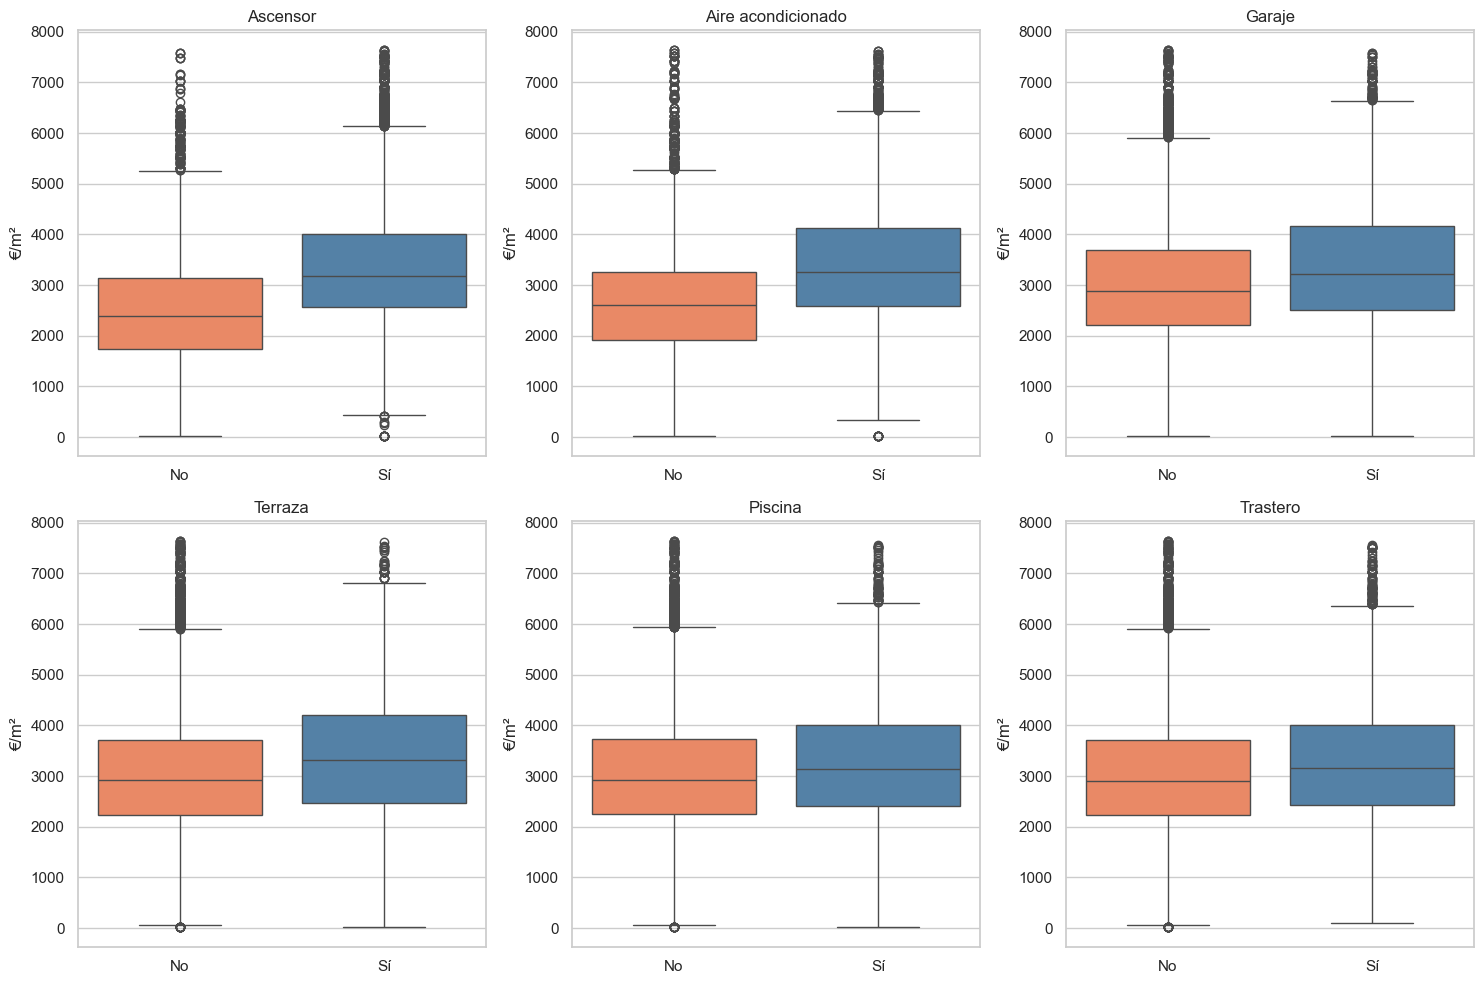

In [34]:
#Precio unitario vs Amenities en viviendas en Venta (Queremos saber cuánto valor añade un amenity al precio de un piso)

def bivariante_precio_amenities(df):
    print("\n" + "="*70)
    print("PRECIO UNITARIO vs AMENITIES (VENTA)")
    
    amenities = ['Ascensor', 'Aire acondicionado', 'Garaje', 'Terraza', 'Piscina', 'Trastero']
    
    df_venta = df[(df['Operación'] == 'Venta') & (df['Precio unitario'] > 0)]
    df_venta = df_venta[df_venta['Precio unitario'] < df_venta['Precio unitario'].quantile(0.99)]
    
    print("\n📊 DIFERENCIA DE €/m² SEGÚN AMENITIES + TEST ESTADÍSTICO:")
    print("-"*70)
    print(f"   {'Amenity':<20} {'Con':>8} {'Sin':>8} {'Diff%':>8} {'p-value':>12} {'Signif.'}")
    print("-"*70)
    
    resultados = []
    for amenity in amenities:
        grupo_si = df_venta[df_venta[amenity] == 'Sí']['Precio unitario']
        grupo_no = df_venta[df_venta[amenity] == 'No']['Precio unitario']
        
        mediana_si = grupo_si.median()
        mediana_no = grupo_no.median()
        diferencia_pct = ((mediana_si - mediana_no) / mediana_no) * 100
        
        # Test Mann-Whitney 
        stat, p_value = stats.mannwhitneyu(grupo_si, grupo_no, alternative='two-sided')
        significativo = "✅ Sí" if p_value < 0.05 else "❌ No"
        
        resultados.append({
            'Amenity': amenity,
            'Con': mediana_si,
            'Sin': mediana_no,
            'Diff_pct': diferencia_pct,
            'p_value': p_value,
            'Significativo': p_value < 0.05
        })
        
        print(f"   {amenity:<20} {mediana_si:>7,.0f}€ {mediana_no:>7,.0f}€ {diferencia_pct:>+7.1f}% {p_value:>12.2e} {significativo}")
    
    
    # Ordenar por diferencia
    resultados = sorted(resultados, key=lambda x: x['Diff_pct'], reverse=True)

    # Gráfico
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, amenity in enumerate(amenities):
        sns.boxplot(data=df_venta, x=amenity, y='Precio unitario', 
                    ax=axes[i], palette=['coral', 'steelblue'], order=['No', 'Sí'])
        
        diff_pct = resultados[i]['Diff_pct'] if resultados[i]['Amenity'] == amenity else \
                   next(r['Diff_pct'] for r in resultados if r['Amenity'] == amenity)
        
        axes[i].set_title(f'{amenity}')
        axes[i].set_ylabel('€/m²')
        axes[i].set_xlabel('')
    
    plt.tight_layout()
    plt.show()

bivariante_precio_amenities(df_limpio)

#Analisis Multivariante: Numerica vs Numerica

#Hacer matriz de correlacion (VENTA) comparando todas las variables numericas entre sí para ver si tienen relacion
#variables: precio, precio unitario, supitorerficie, dormios, baños

In [35]:
def matriz_correlacion(df):
    print("\n" + "="*70)
    print("MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS")
    print("="*70)
    
    df_venta = df[(df['Operación'] == 'Venta') & (df['Precio unitario'] > 0)].copy()
    numericas = ['Precio', 'Precio unitario', 'Superficie', 'Dormitorios', 'Baños']
    
    # Filtrar datos
    df_venta = df[(df['Operación'] == 'Venta') & (df['Precio unitario'] > 0)].copy()
    df_alquiler = df[(df['Operación'] == 'Alquiler') & (df['Precio unitario'] > 0)].copy()
    
    # Eliminar NaN de TODAS las columnas numéricas a la vez
    df_venta_clean = df_venta[numericas].dropna()
    df_alquiler_clean = df_alquiler[numericas].dropna()
    
    # Matrices de correlación
    corr_venta = df_venta_clean.corr()
    corr_alquiler = df_alquiler_clean.corr()
    
    # Gráfico
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.heatmap(corr_alquiler, annot=True, cmap='RdYlGn', center=0, 
                ax=axes[0], fmt='.2f', vmin=-1, vmax=1, square=True)
    axes[0].set_title('Matriz de Correlación - ALQUILER')
    
    sns.heatmap(corr_venta, annot=True, cmap='RdYlGn', center=0, 
                ax=axes[1], fmt='.2f', vmin=-1, vmax=1, square=True)
    axes[1].set_title('Matriz de Correlación - VENTA')
    
    plt.tight_layout()
    plt.show()
    
    # Correlaciones con p-values (VENTA)
    print("\n📊 CORRELACIONES CON TEST DE SIGNIFICANCIA (VENTA):")
    print("-"*70)
    print(f"   {'Variables':<35} {'r':>8} {'p-value':>12} {'Fuerza':<12} {'Signif.'}")
    print("-"*70)
    
    for i, col1 in enumerate(numericas):
        for col2 in numericas[i+1:]:
            # Usar los datos ya limpios
            r, p_value = stats.pearsonr(df_venta_clean[col1], df_venta_clean[col2])
            
            if abs(r) > 0.7:
                fuerza = "FUERTE"
            elif abs(r) > 0.3:
                fuerza = "MODERADA"
            else:
                fuerza = "DÉBIL"
            
            significativo = "✅ Sí" if p_value < 0.05 else "❌ No"
            
            print(f"   {col1} vs {col2:<20} {r:>+8.2f} {p_value:>12.2e} {fuerza:<12} {significativo}")
    

    
    return corr_venta, corr_alquiler


# 3.2 SCATTER PLOTS 

def scatter_plots(df):
    print("\n" + "="*70)
    print("SCATTER PLOTS - RELACIONES ENTRE VARIABLES")
    print("="*70)
    
    # Filtrar datos base
    df_venta = df[(df['Operación'] == 'Venta') & (df['Precio unitario'] > 0)].copy()
    
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # 1. Precio vs Superficie
    ax1 = axes[0, 0]
    df_clean1 = df_venta[['Superficie', 'Precio']].dropna()
    sns.scatterplot(data=df_clean1, x='Superficie', y='Precio', ax=ax1, alpha=0.3, color='coral')
    r, p = stats.pearsonr(df_clean1['Superficie'], df_clean1['Precio'])
    ax1.set_title(f'Precio vs Superficie (r = {r:.2f})')
    ax1.set_xlabel('Superficie (m²)')
    ax1.set_ylabel('Precio (€)')
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
    
    # 2. Precio unitario vs Superficie
    ax2 = axes[0, 1]
    df_clean2 = df_venta[['Superficie', 'Precio unitario']].dropna()
    sns.scatterplot(data=df_clean2, x='Superficie', y='Precio unitario', ax=ax2, alpha=0.3, color='steelblue')
    r, p = stats.pearsonr(df_clean2['Superficie'], df_clean2['Precio unitario'])
    ax2.set_title(f'€/m² vs Superficie (r = {r:.2f}) - SIN RELACIÓN')
    ax2.set_xlabel('Superficie (m²)')
    ax2.set_ylabel('€/m²')
    
    # 3. Superficie vs Dormitorios
    ax3 = axes[1, 0]
    df_clean3 = df_venta[['Dormitorios', 'Superficie']].dropna()
    sns.scatterplot(data=df_clean3, x='Dormitorios', y='Superficie', ax=ax3, alpha=0.3, color='green')
    r, p = stats.pearsonr(df_clean3['Dormitorios'], df_clean3['Superficie'])
    ax3.set_title(f'Superficie vs Dormitorios (r = {r:.2f})')
    ax3.set_xlabel('Dormitorios')
    ax3.set_ylabel('Superficie (m²)')
    
    # 4. Dormitorios vs Baños
    ax4 = axes[1, 1]
    df_clean4 = df_venta[['Dormitorios', 'Baños']].dropna()
    sns.scatterplot(data=df_clean4, x='Dormitorios', y='Baños', ax=ax4, alpha=0.3, color='purple')
    r, p = stats.pearsonr(df_clean4['Dormitorios'], df_clean4['Baños'])
    ax4.set_title(f'Baños vs Dormitorios (r = {r:.2f})')
    ax4.set_xlabel('Dormitorios')
    ax4.set_ylabel('Baños')
    
    plt.tight_layout()
    plt.show()



# PAIRPLOT 

def pairplot_numericas(df):
    print("\n" + "="*70)
    print("PAIRPLOT - TODAS LAS RELACIONES A LA VEZ")
    print("="*70)
    
    numericas = ['Precio', 'Precio unitario', 'Superficie', 'Dormitorios', 'Baños']
    
    # Filtrar y limpiar datos
    df_venta = df[(df['Operación'] == 'Venta') & (df['Precio unitario'] > 0)].copy()
    df_venta = df_venta[df_venta['Precio'] < df_venta['Precio'].quantile(0.95)]
    df_venta = df_venta[df_venta['Superficie'] < 250]
    
    # Eliminar NaN de todas las columnas numéricas
    df_clean = df_venta[numericas].dropna()
    
    # Muestra para velocidad
    df_sample = df_clean.sample(n=min(2000, len(df_clean)), random_state=42)
    
    g = sns.pairplot(df_sample, 
                     diag_kind='hist',
                     plot_kws={'alpha': 0.3, 's': 10},
                     diag_kws={'bins': 30})
    g.figure.suptitle('Pairplot - Variables Numéricas (VENTA)', y=1.02)
    plt.show()
    


MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS


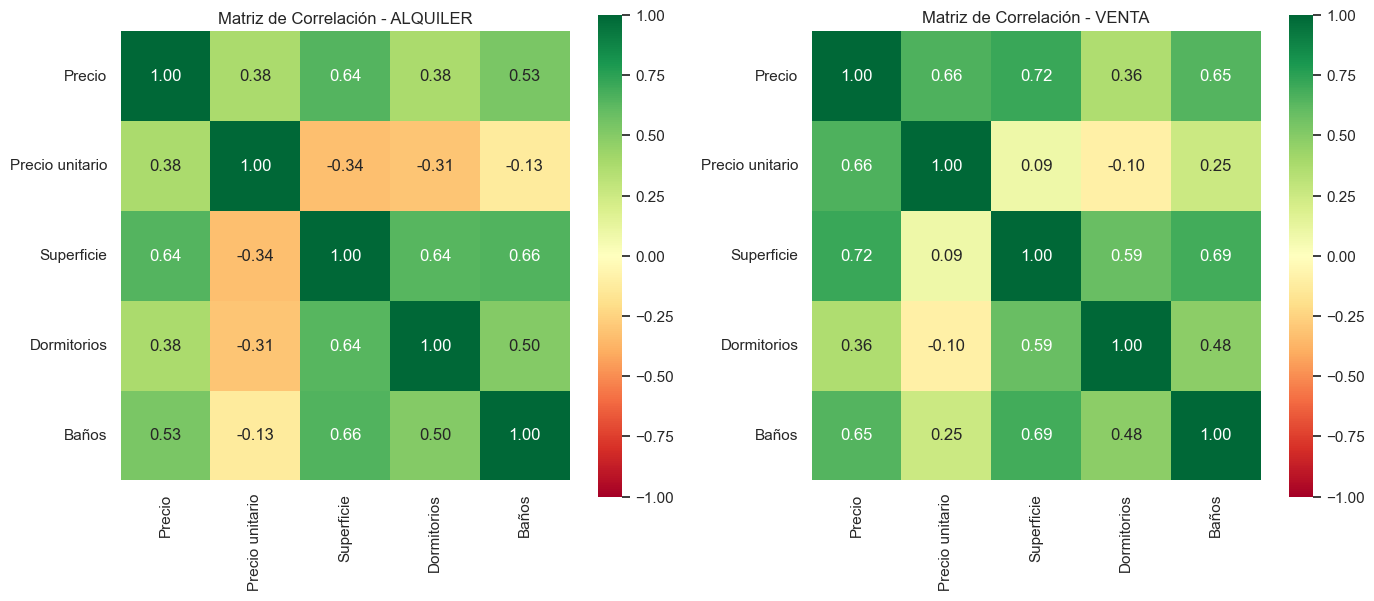


📊 CORRELACIONES CON TEST DE SIGNIFICANCIA (VENTA):
----------------------------------------------------------------------
   Variables                                  r      p-value Fuerza       Signif.
----------------------------------------------------------------------
   Precio vs Precio unitario         +0.66     0.00e+00 MODERADA     ✅ Sí
   Precio vs Superficie              +0.72     0.00e+00 FUERTE       ✅ Sí
   Precio vs Dormitorios             +0.36     0.00e+00 MODERADA     ✅ Sí
   Precio vs Baños                   +0.65     0.00e+00 MODERADA     ✅ Sí
   Precio unitario vs Superficie              +0.09     1.45e-31 DÉBIL        ✅ Sí
   Precio unitario vs Dormitorios             -0.10     6.73e-40 DÉBIL        ✅ Sí
   Precio unitario vs Baños                   +0.25    3.89e-263 DÉBIL        ✅ Sí
   Superficie vs Dormitorios             +0.59     0.00e+00 MODERADA     ✅ Sí
   Superficie vs Baños                   +0.69     0.00e+00 MODERADA     ✅ Sí
   Dormitorios vs Baños

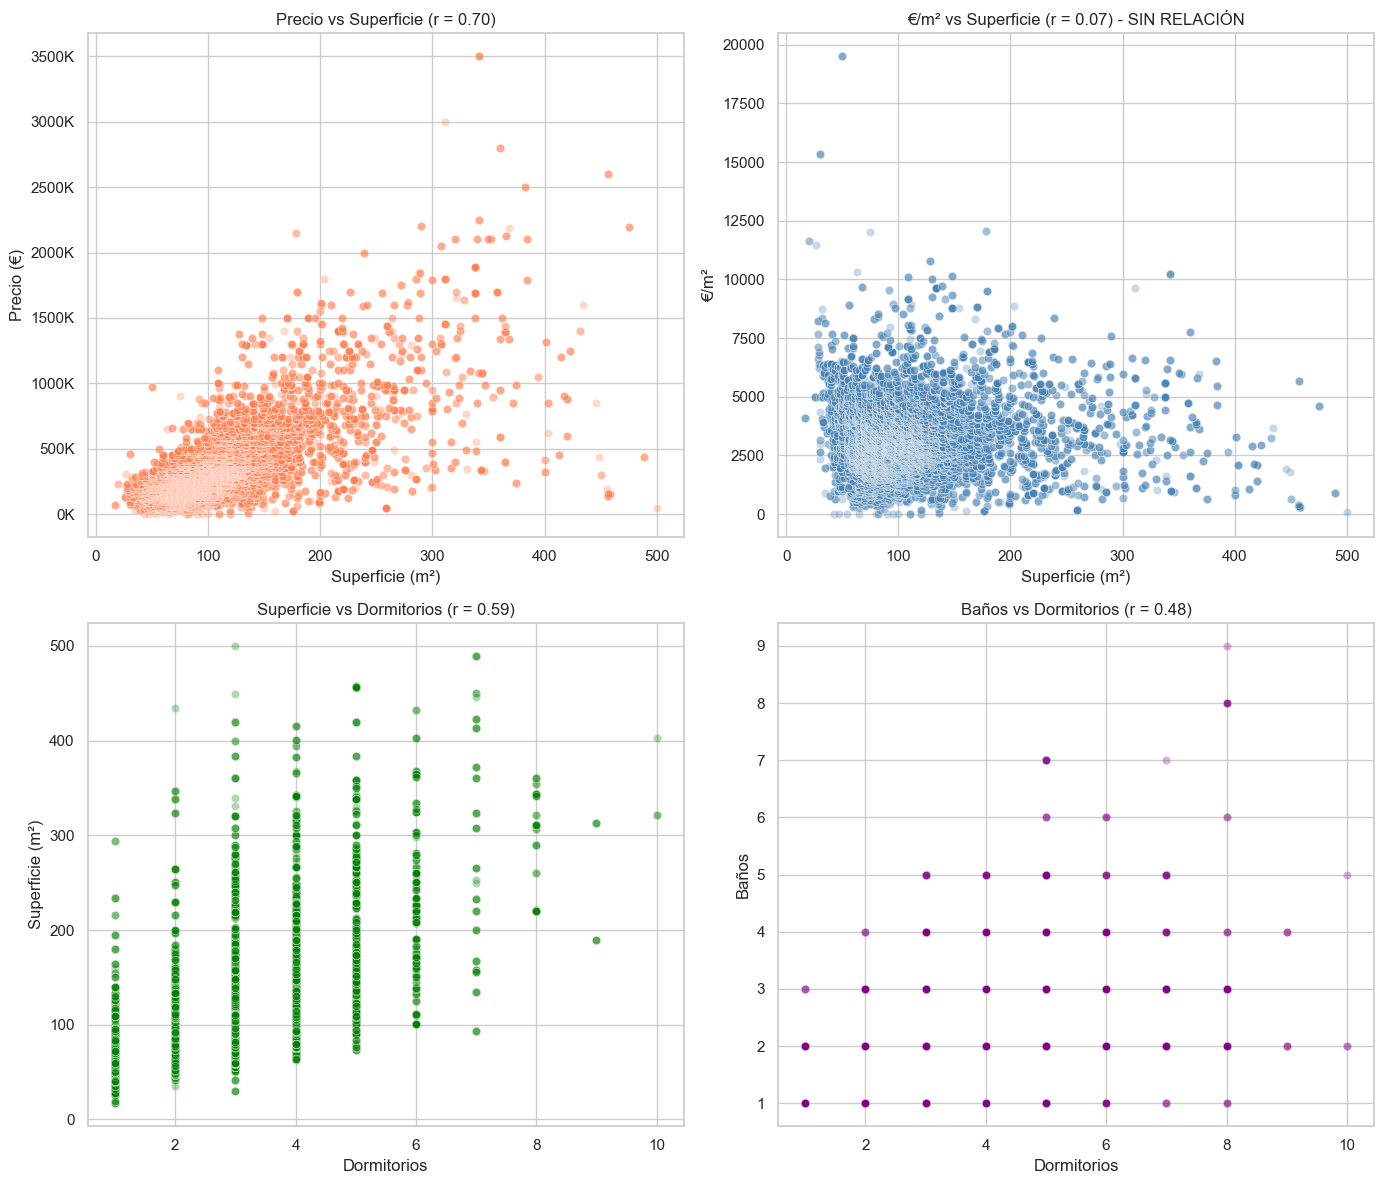


PAIRPLOT - TODAS LAS RELACIONES A LA VEZ


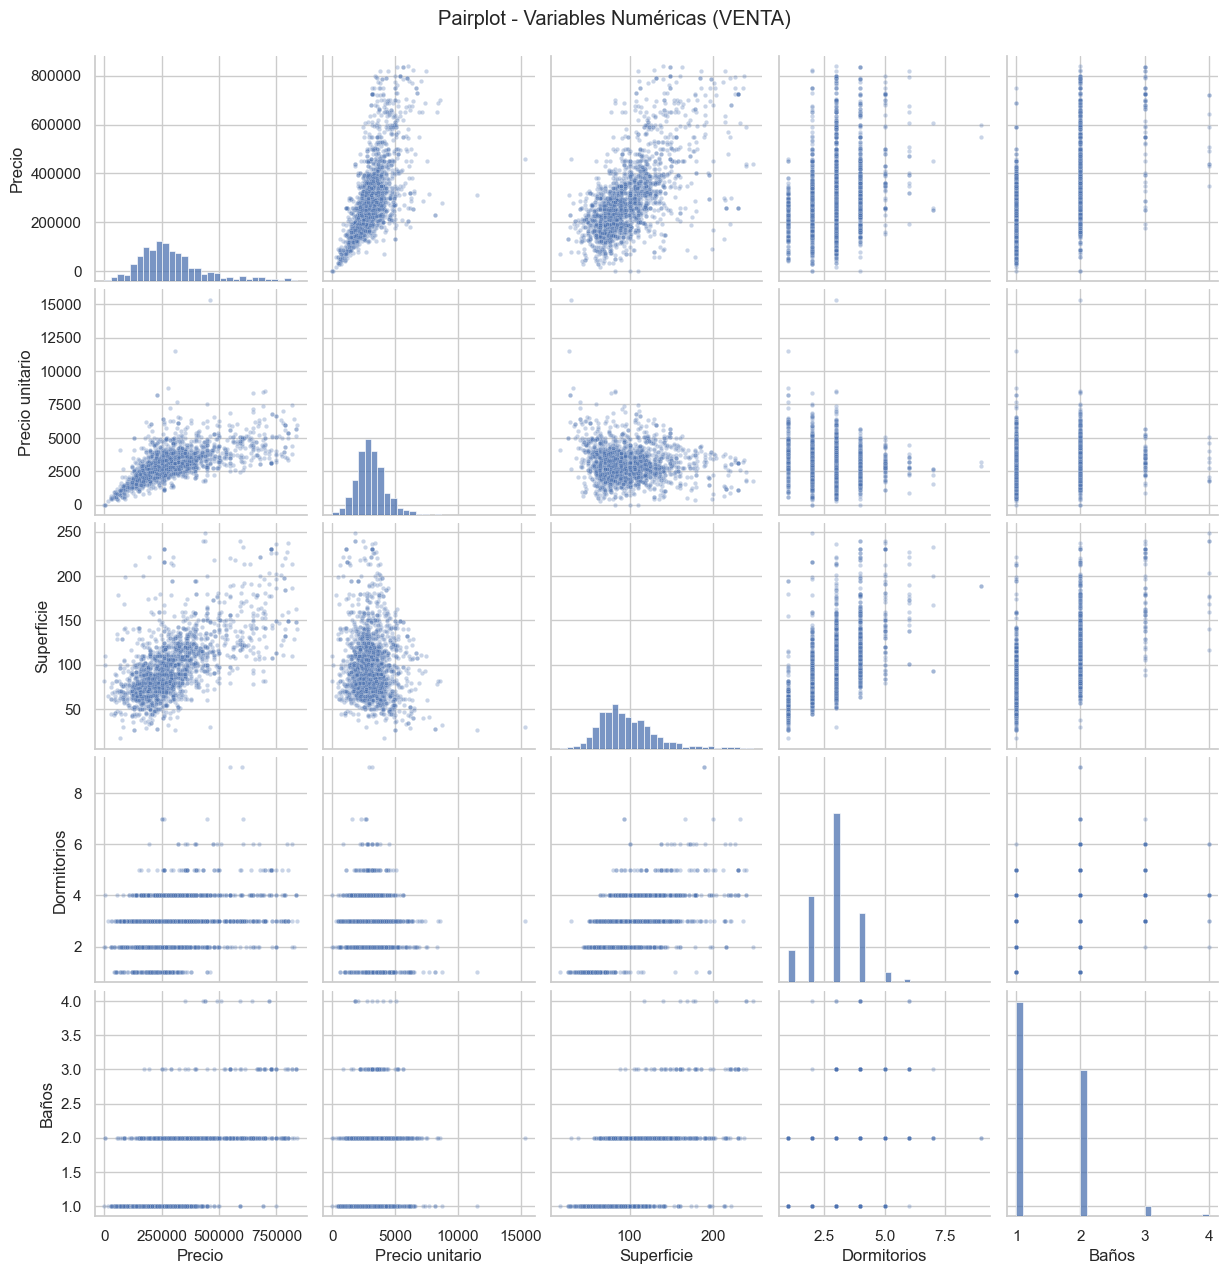

In [36]:
matriz_correlacion(df_limpio)
scatter_plots(df_limpio)
pairplot_numericas(df_limpio)

# Conclusiones #

* Operacion vs Fuente: Los 3 portales tienen distribución similar. No hay diferencias relevantes entre portales.
* Operación vs Anunciante: Los particulares prefieren alquilar (68%).
* Demanda vs Operación: El alquiler tiene 3 veces más demanda que la venta. La venta tiene mucha sobreoferta.
* Precio unitario vs Amenities: El ascensor y el aire acondicionado incrementan significativamente el valor de una vivienda.
* Multivariante:
- El precio depende de la superficie (a más superficie mayor precio total)
- El precio unitario no depende de la superficie, lo cual puede significar que el precio por metro cuadrado depende la ubicación, no del tamaño.